# ModelFlow, A library to manage and solve Models

##  Why Model flow?
**Specify very large (or small) models** as concise and intuitive equations. The python code to calculate/solve the model is automatic generated. The user don't have to do the household chores and can concentrate on the economic content. 

**Large models**. 1 million equation and more can be handled. Models with many banks or other agents and granular data can get very large. 

**Agile model development** Model are specified at a high level of abstraction and are processed fast. Also solving/calculating models are fast. This makes experiments with model specification agile and fast. 

**Get rid of models models implemented in Excel**. Large models in Excel are difficult to maintain, revise and quality check. Excel is also very slow in calculating models. Moreover Excel don't handle models with contemporaneous feedback well. 

**Onboarding models and combining from different sources**. Creating a Macro prudential model often entails recycling several models specified in different ways: Excel, Latex, Dynare, Python or other languages. Python's ecosystem makes it possible to transform many different models into ModelFlow models or to wrap them into functions which can be called from ModelFlow models. 

**Onboarding data from different sources**. Pythons Pandas Library and other tools are fast and efficient for data management.

**A rich set of analytical tools for model and result analytic** helps to understand the model and its results. 

**The user can extend and modify the tools** to her or his needs. All code is in Python and the core is quite small.       


## Use ModelFlow on your local machine

The easy way to install ModelFlow libraries are located in a Github repo which you can download. It is located here:

[https://github.com/IbHansen/ModelFlow2](https://github.com/IbHansen/ModelFlow2) 


You need Python 3.8+ with associated libraries. The easy way to get Python is to install Anaconda Python from here:

[https://www.anaconda.com/distribution](https://www.anaconda.com/distribution)



## Run this notebook on a virtual machine. 

 

To get access to the jupyter notebooks in the repo, run this: 

https://mybinder.org/v2/gh/Ibhansen/ModelFlow2/master

This will open a Home tab in your browser. The notebooks are the .ipynb files. 

The virtual machine is created using [Binder](https://mybinder.readthedocs.io/en/latest) .

Using the toolbar you can toggle the Table of content, and you can activate the RISE. RISE will allow you to view the notebook as a slideshow. 

To benefit fully of the notebook look into how Jupyter works:

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html 

##  Introduction 
The main purpose of ModelFlow is to bring a model and a data set together. Then the model can be solved, and the results analyzed and
compared. The user can do this either with the Python methods that ModelFlow will wrap around the model, or by by using the many datascience tools provided by the Python ecosystem. 

**Models can be specified in a high level Business logic language (a Domain Specific language)**. This allows the formulation of a model in a concise and expressive language which is close to the economic of the model. The user can concentrate on the economic or financial content - not the coding of the solution. The code for solving the model is generated by the tool. 

 - a model can be *simultaneous* or *non-simultaneous*
 - a model can be specified as a normalized model - $y = F(y,x)$,or a general form model - $0=G(y,x)$  
 - simultaneous models can be solved by:
     - Gauss-Seidle or Newton-Raphson algorithmes if no leads - ie the formulas are recurrence 
     - Fair-Taylor or stacked Newton-Raphson if the model contains leads 
     - The jacobian matrice used by Newton-Raphson solvers will can be calculated either by symbolic differentiation or by numerical differentiation 
 - non-simultaneous models will be sequenced and calculated. 
 - variables in a model can be scalars or matrices.

If the
model is not initially specified in the Business logic language, Python
offers a wide range of possibilities to grab a model and transform it to
the Business logic language. Also, models in the form of Matlab
functions can be wrapped and called from ModelFlow. This allows for the recycling and integration models sourced from a number of different origins. 

Thus a model **flows** through a number of phases, from a formulation in business logic language to a Python program which can solve the model. 

**ModelFlow is written in Python**. Python comes "batteries included" and is
the basis of a very rich ecosystem, which consists of a wide array of
libraries. ModelFlow is just another library. It supplements the existing
libraries regarding modeling language and solving and allows the use of
Python as a model management framework.

**Data handling and wrangling is done in the Pandas library**. This
library is the Swiss army knife of data science in Python. It can import and export data to most systems and it is very powerful in manipulating and transforming data.
The core
element of Pandas is the *Dataframe*. A Dataframe is a two-dimensional
tabular data structure. Each *column* consists of cells of the same type
-- it can be a number, a string, a matrix or another Python data object.This includes matrices and other dataframes. Each *row is indexed.* The index can basically be any type of variable
including dates, which is especially relevant for economic and financial models.

**ModelFlow gives the user tools for more than solving models**. This
includes:

-   *Visualization* and comparison of results

-   *Integration* of models from different sources

-   *Analyze the logical structure of a model*. By applying graph theory, 
    ModelFlow can find data lineage, find a suitable calculating sequence and trace 
    causes of changes through the calculations.

-   *Inverting* the model to calculating the necessary instruments to
    achieve a desired target.

-   Calculating the *attributions* from input to the results of a model.

-   Calculating the *attribution* from input to the result of each
    formula.

-   Finding and calculating partial *derivatives* of formulas

-   *Integrating user defined python functions* in the Business logic
    language (like optimization, calculating risk weights or to make a matrices consistent with the RAS algorithm  )

-   *Wrap matlab* models so they can be used in the Business logic
    language.

-   *Speed up* solving using "Just in time compilation"

-   Analyze the model structure through tools from graph theory

-   Handle *large models.* 1,000,000 formulas is not a problem.

-   Integrate model management in Jupyter notebooks for *agile and user
    friendly model use*


**The core code of ModelFlow is small and
documented.** Thus it can easily be modified and expanded to the specific need of the user. *ModelFlow is a toolset*. It can handle models, which conform to the tools.

If you need a feature or have a model which can't be handled in ModelFlow,
you are encouraged to improve ModelFlow. Please share the
improvement, other users may have the same need, or can be inspired by
your work.

Also bear in mind that ModelFlow is experimental. It is provided ”as is”, without any representation or warranty of any kind either express or implied.   

The code is located here: [https://github.com/IbHansen/ModelFlow2](https://github.com/IbHansen/ModelFlow2)

The rest of this document will start with a simple example, then it will go into more detail regarding how to use (some of) the features. 

## Import relevant libraries
Here the nessecary libraries are imported. Imports starting with *model* are 
part of the ModelFlow library 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd               # Python data science library
import numpy as np
import re
import sys

import modelclass as mc           # ModelFlow, model handeling module 
from modelclass import model
import modelmanipulation as mp    # Module for model text processing
import modelpattern as pt
from modelmanipulation import explode
import modeldekom as md
import modelvis as mv
import modelinvert as mi
import modelnet as mn 
import modeldiff as mdif

## Create model equations / formulas 
The model equations are a Python string. In a simple model the calculations are specified just as formulas. Time is implicit and lags are marked by (-). 

Each formula starts with a "FRML" and ends with a $. Also each formula has formula options enclosed in <>. In this simple model we don't use any advanced features.

You will notice, that the formulas do not have to be ordered in the logical calculation sequence. This will be done by ModelFlow. 

In [3]:
fmodel      = '''
frml <> a = c(-1) + b $ 
frml <> d1 = x + 3 * a(-1)+ c **2 +a  $ 
frml <> d3 = x + 3 * a(-1)+c **3 $  
Frml <> x = 0.5 * c $'''

## Create a model instance
**Now we want to take the formulas (equations) and create a devise which can run the model.** This device is an instance of the **model class**. 

After the creation the instance can solve the model, visualize results and 
provide information regarding the model 


In [4]:
mmodel = model(fmodel,modelname = 'My first model')

## Create a Dataframe
**The model needs some data to run**. So we create a pandas dataframe. 

A dataframe is a matrix, where the columns designate variables in the model, and rows are time dimensions. 

In [5]:
df = pd.DataFrame({'B': [1,1,1,1],'C':[1,2,3,6],'E':[4,4,4,4]},index=[2018,2019,2020,2021])
df  

,B,C,E
2018,1,1,4
2019,1,2,4
2020,1,3,4
2021,1,6,4


## Run the model 
**We can now run the model using the data.** The result is a new dataframe. 

If the dataframe don't contain all the variables from the model, the dataframe will be padded with the missing 
variables. Their values are set to 0.0. 

The model can be solved for the rows in the dataframe for which it is possible. This means that the maximal lags has to be taken into account. In this example the maximal lag is 1, so the model can be solved from 2019 to 2021.  

In [6]:
mmodel(df)  

Will start calculating: My first model
2019  solved
2020  solved
2021  solved
My first model calculated 


,B,C,E,X,D3,A,D1
2018,1.0,1.0,4.0,0.0,0.0,0.0,0.0
2019,1.0,2.0,4.0,1.0,9.0,2.0,7.0
2020,1.0,3.0,4.0,1.5,34.5,3.0,19.5
2021,1.0,6.0,4.0,3.0,228.0,4.0,52.0


##  Make a new experiment
One experiment is useful, but usually we want to compare the results of several experiments.

So the C variable is updated to new values, and the model is run again. 

In [7]:
df.C = [4,5,7,9]
df.B = [1,2,3,4]
mmodel(df)

Will start calculating: My first model
2019  solved
2020  solved
2021  solved
My first model calculated 


,B,C,E,X,D3,A,D1
2018,1.0,4.0,4.0,0.0,0.0,0.0,0.0
2019,2.0,5.0,4.0,2.5,127.5,6.0,33.5
2020,3.0,7.0,4.0,3.5,364.5,8.0,78.5
2021,4.0,9.0,4.0,4.5,757.5,11.0,120.5


## Visualizing
A model run returns a dataframe with the results. These can be analyzed and visualized by python libraries like pandas and matplotlib. 

However, the results are also saved as propertied in the model instance. By using the information regarding both the model and the results a number of tools for visualizing, analyzing and debugging can applied. 

Per default the first result dataframe  and the last result dataframe are retained in the model instance. The first is called:**basedf** the last is called:**lastdf**. 

By setting or accessing **model.basedf** and **model.lastdf**, these properties can also be set or retrieved by the user.

### Single variable

All model variable can be accessed with model_instance.variable_name notation. The resulting object will return information regarding the variable. 
    
The python feature "Tab-completion" can be used to select which variable to show. So when the user  
pres the tab-key, a list of matching variable names will be displayed, and the user can those
from the list.     

For a single variable there are a number of methods for gaining insight in both the dependencies and the results. If we just give the variable as attribute like in the cell below. We will get a some basic information regarding the variable.  

In [8]:
mmodel.D1

Endogeneous: D1: 
Formular: FRML <> D1 = X + 3 * A(-1)+ C **2 +A  $

D1: 
A : 
C : 
X : 

Values :


,2019,2020,2021
Base,7.00,19.50,52.00
Last,33.50,78.50,120.50
Diff,26.50,59.00,68.50


Input last run:


,2019,2020,2021
A,6.00,8.00,11.00
A(-1),0.00,6.00,8.00
C,5.00,7.00,9.00
X,2.50,3.50,4.50


Some methods are available to use after the variable name: One such is **draw**, the next cell shows the parent and child's of the X variable, and also the values of each of the variables. Both in the baseline run (default: the first run of the model) and in the last run of the model. 

So in this model X depends on C, and X is contributing to D1 and D3. 

Output from **draw** can become quite large for complex and deep models. Therefor the user can control both the amount of information for the variables and how many generations the graph has to cover. 

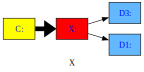

In [9]:
mmodel.draw('X',all=1,size=(2,2))

### We can also explain the change in the variable
Having two runs of the model, it is useful to find the attribution to the change in values from the first to the second run. This is done by the explain method. 

The width of arrows reflects how much of the change in a variable can be explained by the change in each incoming variable.  

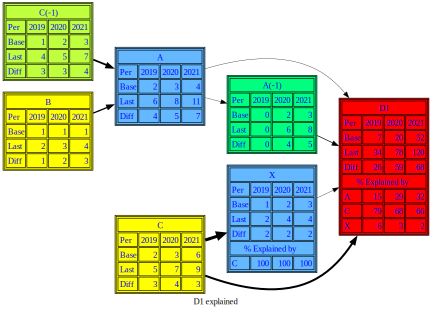

In [10]:
_=mmodel.D1.explain(up=2)

This can become a very busy graph for large models where  there are really many nodes. 
Like shocks for all countries in an EBA stress test. So take care what you ask for. 

The output can also be produced in PDF or svg format. These formats are vector based, and it is possible to zoom into a large graph without loosing information. 

###  Slices of variables
In order to make life easy when using models with consistent and structured variable naming conventions wildcards can be used to select the variables to visualize through ModelFlow. 
Some are displayed below. 

If this is not sufficient the whole suite of Python visualization libraries (as Matplotlib, Seaborn, Plotly) can be used on top of the resulting Dataframes. 

#### The values

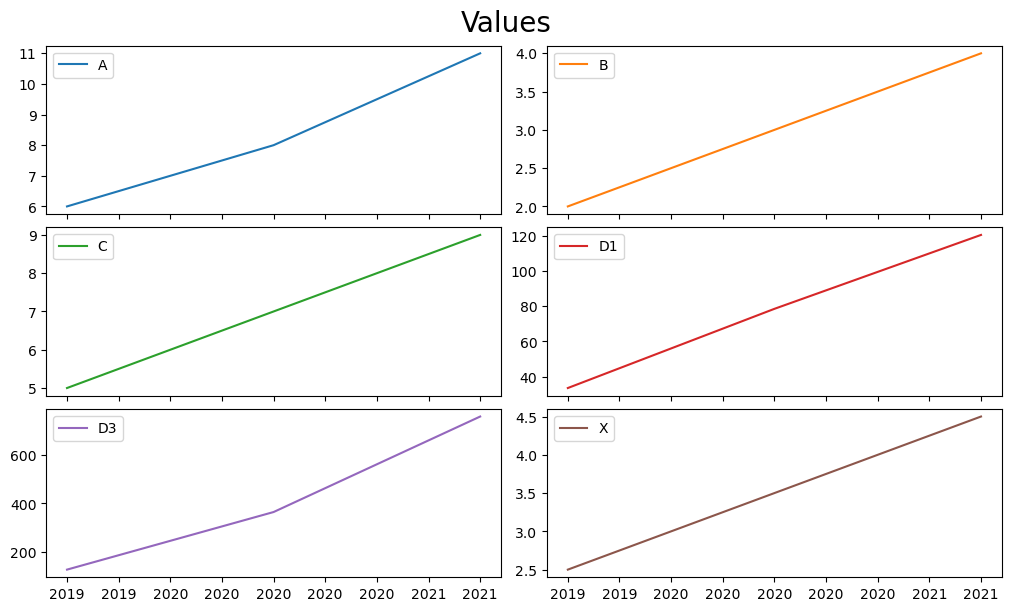

In [11]:
_=mmodel['*'].plot(title='Values')

#### The values

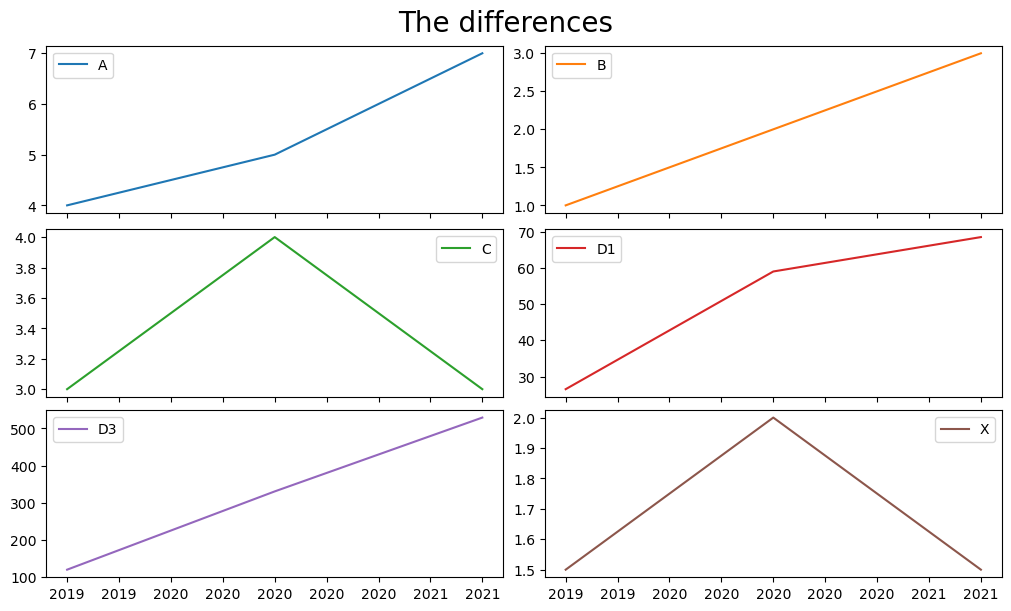

In [12]:
_=mmodel['*'].dif.plot(title='The differences')

#### The differences between the runs, as heatmap

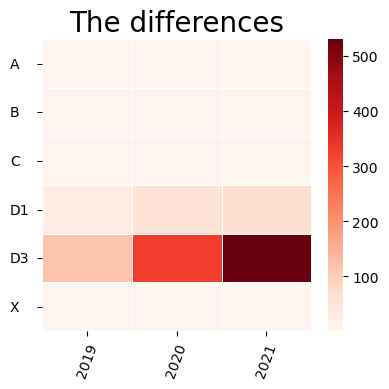

In [13]:
_=mmodel['*'].dif.heat(size=(4,4),title='The differences')

### Structure
As the structure of the model is in the model instance, we can visualize the structure of the whole model.  

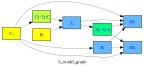

In [14]:
mmodel.drawmodel(size=(2,2))

### The model structure with values 
Also we can combine the structure and the model in order to get the complete picture. 

However take care for large models. 

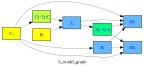

In [15]:
mmodel.drawmodel(all=1,size=(2,2))

This was a quick walk through how to define a simple model, make some mock data, run the model and visualize the structure and the results. 

Now we can explore the features of ModelFlow. 

## What is a Model in ModelFlow
ModelFlow is created to handle models. The term [**model**](https://en.wikipedia.org/wiki/Model) can mean a lot of different concepts. 

The scope of models handled by ModelFlow is discrete models which is the same for each time frame, can be formulated as mathematical equations and *can* have lagged and leaded variables. This allows the system to handle quite a large range of models.

A model with:

 - $\textbf n$ number of endogeneous variables
 - $\textbf k$ number of exogeneous variables 
 - $\textbf u$ max lead of endogeneous variables
 - $\textbf r$ max lag of endogeneous variables 
 - $\textbf s$ max lag of exogeneous variables 
 - $t$ time frame (year, quarter, day second or another another unit)
 
can be written in two ways, normalized or un-normalized form

### normalized form

\begin{eqnarray}
y_t^1 & = & f^1(y_{t+u}^1...,y_{t+u}^n...,y_t^2...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
y_t^2 & = & f^2(y_{t+u}^1...,y_{t+u}^n...,y_t^1...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
\vdots \\
y_t^n & = & f^n(y_{t+u}^1...,y_{t+u}^n...,y_t^1...,y_{t}^{n-1}...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^r,x..._{t-s}^1...,x_{t-s}^k)
\end{eqnarray}


Many stress test, liquidity, macro or other models conforms to this pattern. Or the can easily be transformed to thes pattern. 

Written in matrix notation where  $\textbf{y}_t$ and $\textbf{x}_t$ are vectors of endogenous/exogenous  variables for time t

\begin{eqnarray}  
\textbf{y}_t & = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-s})
\end{eqnarray}

The functions are normalized, meaning: 

- Each endogenous variable is on the left hand side one time - and only one time.
- An endogenous variable without lags can **not** be on the right hand side in an equation, which has the variable on the left hand side. 

### Un-normalized form
Some economic models can not easy be specified as normalized formulas. Especially   models with equilibrium  conditions can more suitable be specified in the more generalized un-normalized form.


\begin{eqnarray}
0 & = & f^1(y_{t+u}^1...,y_{t+u}^n...,y_t^1...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
0 & = & f^2(y_{t+u}^1...,y_{t+u}^n...,y_t^1...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
\vdots \\
0 & = & f^n(y_{t+u}^1...,y_{t+u}^n...,y_t^1...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^r,x..._{t-s}^1...,x_{t-s}^k)
\end{eqnarray}



Written in matrix notation like before:

\begin{eqnarray}  
\textbf{0}& = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-s})
\end{eqnarray}

The number of endogenous variables and equations should still be the same.

ModelFlow allows variable (the $\textbf x$'es and the $\textbf y$'es the to be scalars, matrices, arrays or pandas dataframes.

## Model solution 
For a normalized model:

\begin{eqnarray}  
\textbf{y}_t & = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-r})     
\end{eqnarray}

a solution is  $\textbf{y}_t^*$ so that:


\begin{eqnarray}  
\textbf{y}_t^* & = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t^* \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-r})     
\end{eqnarray}

For the un-normalized model:
\begin{eqnarray}  
\textbf{0}& = & \textbf{F}(\textbf{y}_{t+u} \cdots \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-s})
\end{eqnarray}


a solution $\textbf{y}_t^*$ is 

\begin{eqnarray}  
\textbf{0} & = & \textbf{G}(\textbf{y}_{t+u} \cdots \textbf{y}_t^* \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-r})     
\end{eqnarray}

Some models can have more than one solution. In this case the solution can depend on the starting point of the solution algorithm. 

## Model derivatives 

Both for solving and for analyzing the causal structure of a model it can be useful to define different matrices of derivatives for a model $\textbf F()$ like this:

\begin{align}  
\textbf{A}_t & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_t^T}  \hphantom{\hspace{5 mm} i=1, \cdots , r}   
 &\hspace{1 mm}\mbox{Derivatives with respect to current endogeneous variables} \\ \\
\textbf{E}_t^i & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_{t-i}^T } \hspace{5 mm} i=1, \cdots , r  &\hspace{1 mm}\mbox{  Derivatives with respect to lagged endogeneous variables  } \\  \\
\textbf{D}_t^j & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_{t+j}^T } \hspace{5 mm} j=1, \cdots , u  &\hspace{1 mm}\mbox{  Derivatives with respect to leaded endogeneous variables  } \\  \\
\textbf{F}_t^k & = & \frac{\partial \textbf{F}}{\partial \textbf{x}_{t-i} ^T} \hspace{5 mm} k=0, \cdots , s  &\hspace{1 mm}\mbox{  Derivatives with respect to current and lagged exogeneous variables  }\\ 
\end{align}

For un-normalized models the derivative matrices are just the dervatives of $\textbf G$ instead of $\textbf F$

Solving the model with a Newton-Raphson method  requires the calculation of a matric of derivatives. This is done by creating an additional model which calculates all the non-zero derivatives. The derivative calculation model can be created both by symbolic differentiation or by numerical differentiation.   

## Model solutions

There are numerous methods to solve models (systems) as mentioned above. ModelFlow can apply 3 different types of model solution methods: 

 1. If the model has **no contemporaneous feedback**, the equations can be sorted 
 [Topological](https://en.wikipedia.org/wiki/Topological_sorting) and then the equations can be calculated in the topological order. This is the same as a spreadsheet would do.  
 2. If the model has **contemporaneous feedback** model is solved with an iterative method. Here variants of well known solution methods are used: 
     1. [Gauss-Seidle](https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method) (**Gauss**) which can handle large systems, is fairly robust and don't need the calculation of derivatives
     2. [Newthon-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method) (**Newton**) which requires the calculation of derivatives and solving of a large linear system but typically converges in fewer iterations. 
 
Nearly all of the models solved by ModelFlow don't contain leaded endogenous variables. Therefor they can be solved one period at a time. For large sparse nonlinear models Gauss works fine. It solves a model quite fast and we don't need the additional handiwork of handling derivatives and large linear systems that Newton methods require. Moreover many models in question do not have smooth derivatives. The order in which the equation are calculated can have a large impact on the convergence speed. 

For some models the Newton algorithm works better. Some models are not able to converge with Gauss-Seidle other models are just faster using Newton. Also the ordering of equations does not matter for the convergence speed. 

However some models like FRB/US and other with **rational expectations** or **model consistent expectations** contains leaded endogenous variables. Such models typical has to be solved as one system for for all projection periods. In this case, the Gauss variation [Fair-Taylor](https://fairmodel.econ.yale.edu/rayfair/pdf/1983A.PDF) or Stacked-Newton Method.  The **stacked Newton** methods can be used in all cases, but if not needed, it will usually use more memory and be slower. 


**Summary of prefered solution methods**

| Model  | No contemporaneous feedback | Contemporaneous feedback | Leaded variables |
| --- | --- | --- |--- | 
|Normalized | Calculate | Gauss or <br> Newton  | Fair Taylor or <br> Stacked Newton|
|Un-normalized | Newton | Newton | Stacked Newton |


 

### Normalized model


#### Calculation, No contemporaneous feedback

In systems with no lags each period can be solved in succession
The equations has to be evaluated in a logical (topological sorted) order. 

Let $z$ be all predetermined values: all exogenous variable and lagged endogenous variable.

Order the $n$ endogeneous variables in topological order.
    
For each time period we can find a solution by

for $i$ = 1 to $n$ 

>$y_{i}^{k} = f_i(y_1^{k},\cdots,y_{i-1}^{k},y_{i+1}^{k-1},\cdots,y_{n}^{k-1},z)$


#### The Gauss-Seidel algorithm. Models with contemporaneous feedback
The Gauss-Seidel algorithm is quite straight forward. It basically iterate over the formulas, until convergence. 

Let $z$ be all predetermined values: all exogenous variable and lagged endogenous variable.
Let $n$ be the number of endogenous variables.
   
For each time period we can find a solution by doing Gauss-Seidel iterations: 

for $k = 1$ to convergence

>for $i$ = 1 to $n$ 
>
>>$y_{i}^{k} = (1-\alpha) * y_{i}^{{k-1}} + \alpha f_i(y_1^{k},\cdots,y_{i-1}^{k},y_{i+1}^{k-1},\cdots,y_{n}^{k-1},z)$

#### Convergence 
Convergence has been reached when the solution don't change to much between each iteration. 
There is no need to check all variable for convergence. So the user can define a 
set $\{$convergence variable$\}$ Then all relative changes from one iteration to has to be smaller than a convergence criteria $\epsilon_{relative}$. It does not make sense to calculate relative changes in values close to 0, so the test is only performed on values larger than a small number $\epsilon_{absolute}$ 

$\forall y_{j}$ where $y_{j} \in \{$convergence variable$\}\land \mid y_{j}^{k-1}\mid \geq \epsilon_{absolute}$ we calculate  $\mid \frac{y_{j}^{k}-y_{j}^{k-1}}{y_{j}^{k-1}}\mid \leq \epsilon_{relative}$


Under some circumstances the the iterations will diverge, even if there is a solution. This can (mostly) be handled by introducing the dampening factor $\alpha$ in the algorithm. $\alpha$ is usually only needed for a few variables - if any. To select an equation for dampening the formula option damp has to be used. 

#### The Newton-Raphson algorithme. Models with contemporaneous feedback

Let $\bf z$ be a vector all predetermined values: all exogenous variable and lagged endogenous variable.

For each time period we can find a solution by doing Newton-Raphson iterations: 

for $k = 1$ to convergence

>$\bf y = \bf {F(y^{k-1},z) }$
>
>$\bf y^{k} =  \bf y - \bf{(A-I)}^{-1} \times ( \bf {y - y^{k-1} })$



The expression: $\bf{(A-I)}^{-1}\times  ( \bf {y - y^{k-1} })$ is the same as the solution to: 

$\bf {y- y^{k-1} } = \bf (A-I) \times \bf x$

This problem can be solved much more efficient than performing $\bf{(A-I)}^{-1}\times  ( \bf {y - y^{k-1} })$

The Scipy library provides a number of solvers to this linear set of equations. There are both solvers using  factorization and iterative methods, and there are solvers for dense and sparce matrices. Theese linear solvers  can easily be incorporated into ModelFlows Newton-Raphson nonlinear solver.

#### Stacked Newton-Raphson all  periods in one go. Models with both leaded and lagged endogeneous variable

If the model has leaded endogenous variables it can in general not be solved one time period at a time. We have to solve the model for all time frames as one large model. 

For the Newton-Raphson algorithme we now have to stack all the derivative matrices. For a model with a max lag of 3 which has to be solved for 8 time periods the stacked matrices looks like this. 

$$\bf{\bar A} =\begin{bmatrix} 
		\bf{A_1}   & \bf{D_1^1} & \bf{D_1^2} & \bf{0}     &\bf{0}      &\bf{0}      &\bf{0}      &\bf{0}  \\
        \bf{E_2^1} & \bf{A_2}   & \bf{D_2^1} & \bf{D_2^2} &\bf{0}      &\bf{0}      &\bf{0}      &\bf{0} \\       
        \bf{E_3^2} & \bf{E_3^1} & \bf{A_3}   & \bf{D_3^1} & \bf{D_3^2} &\bf{0}      &\bf{0}      &\bf{0} \\       
        \bf{E_4^3} & \bf{E_4^2} & \bf{E_4^1} & \bf{A_4}   & \bf{D_4^1} & \bf{D_4^2} &\bf{0}      & \bf{0} \\       
        \bf{0}     & \bf{E_5^3} & \bf{E_5^2} & \bf{E_5^1} & \bf{A_5}   & \bf{D_5^1} & \bf{D_5^2} &\bf{0}\\       
        \bf{0}     & \bf{0}     & \bf{E_6^3} & \bf{E_6^2} & \bf{E_6^1} & \bf{A_6}   & \bf{D_6^1} & \bf{D_6^2}\\       
        \bf{0}     & \bf{0}     & \bf{0}     & \bf{E_7^3} & \bf{E_7^2} & \bf{E_7^1} & \bf{A_7}   & \bf{D_7^1} \\       
        \bf{0}     & \bf{0}     & \bf{0}     & \bf{0}     & \bf{E_8^3} & \bf{E_8^2} & \bf{E_8^1} & \bf{A_8} \\       
\end{bmatrix} \bar y = \begin{bmatrix}\bf{y_1}\\\bf{y_2}\\\bf{y_3}\\ \bf{y_4} \\\bf{y_5} \\\bf{y_6} \\ \bf{y_7} \\ \bf{y_8} \end{bmatrix} \bar F = \begin{bmatrix}\bf{F}\\\bf{F}\\\bf{F}\\ \bf{F} \\\bf{F} \\\bf{F} \\ \bf{F} \\ \bf{F} \end{bmatrix}$$


Again let $\bf z$ be a vector all predetermined values: all exogenous variable and lagged endogenous variable.

Now the solution algorithme looks like this. 

for $k = 1$ to convergence

>$\bf{\bar y} = \bf {\bar F(\bar y^{k-1},\bar z) }$

>$\bf {\bar y^{k}} =  \bf{\bar y} - \bf{(\bar A-I)}^{-1}\times ( \bf {\bar y - \bar y^{k-1} })$

Notice that the model $\bf F$ is the same for all time periods

Again we solve the problem: $$( \bf {\bar y - \bar y^{k-1} }) = \bf{(\bar A-I)}\times \bf x $$


##### Stacked Newton with no leaded endogenous variables. 

In this case all the $\bf{D}$ submatrices in the above algorithm disappear. 

#### Fair-Taylor algorithm, Models with both leaded and lagged endogeneous variable 

Another way to solve the model as one system is the Fair-Taylor algorithm. It can be seen as an extension to the gauss algorithm for the whold system, with the added twist that each period is solved. 


for $f$ = 1 to convergence
>for $t = 1$ to end time
>>$\textbf{y}_t^f= solve( \textbf{F}(\textbf{y}_{t+u}^{f-1}  \cdots \textbf{y}_{t-r}^{f},\textbf{x}_t \cdots, \textbf{x}_{t-r}))$

Where $solve$ in the inner loop can be either a Gauss or a Newton one period solve algorithm. ModelFlow use the Gauss solver in the inner loop. But it would be straight forward to implement a Newton inner loop.   


### Un-normalized model 

### The simultaneous model,  with leaded variables
**If F has contemporaneous feedback and leaded endogeneous variables, it has to be solved for all timeframes - again with an iterative method.** Modelflow can use the Fair-Taylor algorithme - which is a Gauss-Seidle derivative or solve the model for all periods with a (stacked) Newton-Raphson algorithme. 

In general the Newton-Raphson algorithme is faster and more stable for this kind of models.

### Stacked Newton-Raphson algorithm

If the model has leaded endogenous variables it can in general not be solved one time period at a time. We have to solve the model for all time frames as one large model. 

For the Newton-Raphson algorithme we now have to stack all the derivative matrices. For a model with a max lag of 3 and a max lead of 2 which has to be solved for 8 time periods the stacked matrices looks like this. 

$$\bf{\bar A} =\begin{bmatrix} 
		\bf{A_1}   & \bf{D_1^1} & \bf{D_1^2} & \bf{0}     &\bf{0}      &\bf{0}      &\bf{0}      &\bf{0}  \\
        \bf{E_2^1} & \bf{A_2}   & \bf{D_2^1} & \bf{D_2^2} &\bf{0}      &\bf{0}      &\bf{0}      &\bf{0} \\       
        \bf{E_3^2} & \bf{E_3^1} & \bf{A_3}   & \bf{D_3^1} & \bf{D_3^2} &\bf{0}      &\bf{0}      &\bf{0} \\       
        \bf{E_4^3} & \bf{E_4^2} & \bf{E_4^1} & \bf{A_4}   & \bf{D_4^1} & \bf{D_4^2} &\bf{0}      & \bf{0} \\       
        \bf{0}     & \bf{E_5^3} & \bf{E_5^2} & \bf{E_5^1} & \bf{A_5}   & \bf{D_5^1} & \bf{D_5^2} &\bf{0}\\       
        \bf{0}     & \bf{0}     & \bf{E_6^3} & \bf{E_6^2} & \bf{E_6^1} & \bf{A_6}   & \bf{D_6^1} & \bf{D_6^2}\\       
        \bf{0}     & \bf{0}     & \bf{0}     & \bf{E_7^3} & \bf{E_7^2} & \bf{E_7^1} & \bf{A_7}   & \bf{D_7^1} \\       
        \bf{0}     & \bf{0}     & \bf{0}     & \bf{0}     & \bf{E_8^3} & \bf{E_8^2} & \bf{E_8^1} & \bf{A_8} \\    
\end{bmatrix} \bar y = \begin{bmatrix}\bf{y_1}\\\bf{y_2}\\\bf{y_3}\\ \bf{y_4} \\\bf{y_5} \\\bf{y_6} \\ \bf{y_7} \\ \bf{y_8} \end{bmatrix} \bar F = \begin{bmatrix}\bf{F}\\\bf{F}\\\bf{F}\\ \bf{F} \\\bf{F} \\\bf{F} \\ \bf{F} \\ \bf{F} \end{bmatrix}$$


$$\bf \bar z$$ contains all predetermined variable. 

Now the solution algorithme looks like this. 

for $k = 1$ to convergence

>$\bf{\bar y\_residual} = \bf {\bar G(\bar y^{k-1},\bar z) }$
>
>$\bf {\bar y^{k}} =  \bf{\bar y} - \bf{\bar A}^{-1} \times \bf {\bar y\_residual}$

Notice that the model $\bf G$ is the same for all time periods

Again we don't compute $\bf{\bar y} - \bf{\bar A}^{-1} \times \bf {\bar y\_residual}$ which requires the "expensiv" inversion of a matrix but solve the problem: $\bf{\bar y\_residual}=\bf{\bar A} \times \bf  x$ which can be done much faster.

# Implementation of solving algorithms in Python
Solving a model entails a number of steps:

1. Specification of the model 
2. Create a dependency graph. 
2. Establish a solve order and separate the the model into smaller sub-models
2. Create a python function which can evaluating $f_i(y_1^{k},\cdots,y_{i-1}^{k},y_{i+1}^{k-1},\cdots,y_{n}^{k-1},z)$
3. If needed, create a python function which can evaluate the Jacobimatrices: $\bf{A,E,D}$  or $\bf{\bar A,\bar E,\bar D}$ 
3. Apply a solve function using the elements above to the data. 

## Specification of model in Business Logic Language
The Business logic Language is a Python like language, where each function $f_i$ from above is specified as:

```
FRML <options> <left hand side> = <right hand side> $ ... 
```

The ```<left hand side>``` should not contain transformations, but can be a tuple which match the ```<right hand side>```. A  \$ separates each formular.

Time is implicit, so $var_t$ is written as ```var```, while $var_{t-1}$ is written as ```var(-1)``` and $var_{t+1}$ is written as ```var(+1)```. Case does not matter. everything is eventual made into upper case. 

It is important to be able to create short and expressive models, therefor. Stress test models should be able to handle many bank and sectors without repeating text. So on top of the **Business logic language**. there is a **Macro Business Logic language**. The primary goal of this is to allow (conditional) looping and normalization of formulas.   


# Onboarding a model 

We want to present a model to the transpiler, so it can create a model instance including a python function which can solve/calculate the model. The primary method for this is to formulate the model in a Business logic Language. 

The purpose of the Business logic language is to enable a clear and
concise specification of the models at hand.

A *macro model* can flow through a *macro-processor* which returns *business logic*. This is then processed by
transpiler to create a python function which can solve the model.

The macro-processer performs text processing:

-   Normalize formulas

-   Decorate formulas

-   Expand arrays

-   Expand matrices

-   Unlooping do-loops

The inspiration is the modeling language of venerable programs like
TSP, Eviews, Troll and SAS/ETS combined with the rules of Python.

If you launch this notebook as Jupyter notebook, you can play around with the business logic language.

There are three types of statements:

1.  Formula statement:\
    Defines transformation of variables in the Dataframe

2.  List statement:\
    Defines lists and associated sub lists. Lists can be
    used to define repetitive items and to define mappings

3.  DO/END DO statements\
    Defines repetitive formulas in which the content of list are
    interpolated

## A Flexible language 
The example above shows how to specify a simple model. It looks like python, except that variable names are substituted to references to pandas dataframe cells after Transpiling. 
This is fine for some problems. 

However a **macro** expanding phase enhance  the language in order to make it more powerful, agile, and and still parsimonious. 

The expanded business logic language introduce a little more. It consists of commands and comments: 

-  frml: Define formulas 
-  list: Define sublist to explode over 
-  do: start exploding 
-  enddo: end exploding

### Variables

**Variable names has to start with a letter or _ then any number of
letters _ or digits. Time t is implicit.** 

**A lag** can be specified right after a variable as: ```(-<lag>)```, meaning:
```horse(-1)``` is the variable ```horse``` lagged one period

A variable can contain a number or a Python object. The Python object can be for instance be a cvxopt matric, a numpy array or even a Pandas dataframe. 

Case does not matter. All variables are translated to upper case. And in
the Dataframe all variables should be upper case.

Lags cannot be specified at the left hand side of =.

## FRML command, defines calculations

```frml <J|JR|I|EXO> left hand side = right hand side $```

If it is done for the whole model, the word frml and the <> clause and $ can be ignored. In this case commands including formulas are separated by newline.

### Right hand side

Operators: 

Standard: ```= + - * / ** ( ) @ ```

Comparison: ```>= <= == !=```  \# evaluates to 0 if false, 1 if true

Special: ```$ > < , . [  ] ``` # used in different python constructions.

### Several variables on the left hand side

There can be several left hand variables. Python rules for tuple
unpacking apply.

```a, b, c = 1, 2, 3 ```

or

```a, b, b = some_function_which returns_3 values(x,y,z,42)```

Be aware that normalization cannot be combined with this feature.

The feature is useful when packing and unpacking matrices and when
applying optimization.

### Text processing functions on the right hand side  

The functions DIFF and DLOG will be expanded on the right hand side. Their argument can be expressions involving lagged variable, therefore they can't be evaluated directly, so they are expanded in the pre-processing phase. 

In [16]:
explode('a = alfa * diff(b)')

'FRML <> A = ALFA * ((B)-(B(-1))) $'

In [17]:
explode('a = alfa * dlog(b)')

'FRML <> A = ALFA * ((LOG(B))-(LOG(B(-1)))) $'

In [18]:
explode('a = alfa * dlog(a+b+c)')

'FRML <> A = ALFA * ((LOG(A+B+C))-(LOG(A(-1)+B(-1)+C(-1)))) $'

### Text processing functions on the left hand of a formular 

In some models, it can be useful to specify a function of the endogenous variable as the target on the left-hand side. In order to do the calculation, the endogenous variable has to be isolated on the left-hand side. This is done in a pre-processing step by applying the inverse of the function to the right-hand side. Functions allowed on left-hand side: **diff, log, dlog, logit**.

These functions are only allowed when there are just one left-hand side variable.

#### Only current or lagged endogeneous variables.
In systems with no lags each period can be solved in succestion

In [19]:
explode('diff(lhv) = 42 * (a+b+c) ')

'FRML <> LHV=LHV(-1)+(42 * (A+B+C))$'

In [20]:
explode('log(lhv) = 42 * (a+b+c) ')

'FRML <> LHV=EXP(42 * (A+B+C))$'

In [21]:
explode('logit(lhv) = 42 * (a+b+c) ')

'FRML <> LHV=(EXP(42 * (A+B+C))/(1+EXP(42 * (A+B+C))))$'

In [22]:
explode('dlog(lhv) = 42 * (a+b+c) ')

'FRML <> LHV=EXP(LOG(LHV(-1))+42 * (A+B+C))$'

### Formula name, enhancing formular calculations 
The purpose of the formula name/control is to enable relevant additions to the formulas, but avoid boilerplate noise to the formulas. 

The control is placed between <> after the 'FRML'. different controls can be separated by ','

#### Absolute adjustment 

In [23]:
mp.explode('<J> lhv = rhs ')

'FRML <J> LHV = RHS  +LHV_J$'

#### Relative adjustment 

In [24]:
mp.explode('<jr> lhv = rhs ')

'FRML <JR> LHV = ( RHS  )*(1+LHV_JR )$'

#### Fixing results 

In [25]:
mp.explode('frml <exo> lhv = rhs ')

'FRML <EXO> LHV =( RHS )*(1-LHV_D)+LHV_X*LHV_D$'

By setting LHV_D the user controls wether LHV is set to the value of the RHS exression or the value LHV_X.

#### Extract model for calculating identities in before projection period

In [26]:
tmodel = '''\
frml <> horse = 1.3 * cow +dgdp(-1)$ 
frml <I> dgdp = gdp/gpd(-1) $
frml <i> dinv = inv/inv(-1) $ '''
print( mp.explode(tmodel))

FRML <> HORSE = 1.3 * COW +DGDP(-1)$
FRML <I> DGDP = GDP/GPD(-1) $
FRML <I> DINV = INV/INV(-1) $


In [27]:
mp.find_hist_model(tmodel)

'frml <I> dgdp = gdp/gpd(-1) $\nfrml <i> dinv = inv/inv(-1) $'

#### Make dampening a formular possible

Z : When solving a model with the Gauss-Seidel algorithm the evaluation
of this formula can be damped.


### Incorporating user defined functions into formulas

The user can incorporate her own routines in the BL language. 
This is giving the user defined functions as the funks argument to the model creation. 

The tokenizer  will recognize the name of the function and place call to the function in the solving routine.  

In [28]:
def f1(x):
    return 42

f2model = '''\
a      = c * 42 
f      = c(-1) >=2 
answer = f1(a)'''

m2model = mc.model(f2model,funks=[f1])


## LIST command, define list and sublists    

Lists are used to direct how the do command explodes a template model. 
And to define sum functions, and for matrix packing and unpacking. 

``` 
List <listname> = <sublistname0> : <sl00> <sl01> .. <sl0n> / 
                     <sublistname1> : <sl10> <sl11> .. <sl1n> /
                     .............................]
                     $
```
**There should always be the same number of elements in sublists**

Example with one sublist: 

```
LIST BANKLIST = BANK : ATBAW DEHAS DEHSH LUPCK DELBY DEVWF ESSAB  $
```

Example with two sublist: 

```
LIST CRCOLIST  =  CRCOUNTRY   : UK DE CH NL BE CA JP KY LU HK  / 
                  CRMODELGEO  : UK DE CH NL BE CA JP R20 LU HK $
``` 

If a list name is created several times, the first time is the used. This makes it more easy to make prototypes for a few banks.


## DO ...  ENDDO, loop over lists   

```
do <listname> $
stuff 
enddo $
```

Will take take the stuff and make a copy for each element of the sublists in list name. 

In [29]:
mtest = ''' 
list banklist = bank : ib soren $
do banklist $
     profit_{bank} = revenue_{bank} - expenses_{bank} $
enddo $ 
'''

print(explode(mtest))

LIST BANKLIST = BANK : IB SOREN $
PROFIT_IB = REVENUE_IB - EXPENSES_IB $
PROFIT_SOREN = REVENUE_SOREN - EXPENSES_SOREN $


### Use of sublist to inject additional information 

In [30]:
mtest = ''' 
list banklist = bank    : ib      soren  marie /
                country : denmark sweden denmark  $
                
do banklist $
    frml <> profit_{bank} = revenue_{bank} - expenses_{bank} $
    frml <> expenses_{bank} = factor_{country} * revenue_{bank} $
enddo $ 
'''

print(mp.explode(mtest))

LIST BANKLIST = BANK    : IB      SOREN  MARIE /
                COUNTRY : DENMARK SWEDEN DENMARK  $
FRML <> PROFIT_IB = REVENUE_IB - EXPENSES_IB $
FRML <> EXPENSES_IB = FACTOR_DENMARK * REVENUE_IB $
FRML <> PROFIT_SOREN = REVENUE_SOREN - EXPENSES_SOREN $
FRML <> EXPENSES_SOREN = FACTOR_SWEDEN * REVENUE_SOREN $
FRML <> PROFIT_MARIE = REVENUE_MARIE - EXPENSES_MARIE $
FRML <> EXPENSES_MARIE = FACTOR_DENMARK * REVENUE_MARIE $


### Nested do

Do loops can be nested.

One just have to take care that there is no duplication of sublist names. 

In [31]:
mtest = ''' 
list banklist = bank    : ib      soren  marie /
                country : denmark sweden denmark  $
                
list assetlist = asset  : nfc sme hh             $
                
                
do banklist $
  ! bank = {bank}
    profit_{bank} = revenue_{bank} - expenses_{bank}-loss_{bank} $
    expenses_{bank} = factor_{country} * revenue_{bank} $
    do assetlist $
      loss_{asset}_{bank} = 0.02 * stock_{asset}_{bank} $
    enddo $
    ! find the sum 
    loss_{bank} = sum(assetlist,loss_{asset}_{bank})    $

enddo $ 
'''

print(explode(mtest))

LIST BANKLIST = BANK    : IB      SOREN  MARIE /
                COUNTRY : DENMARK SWEDEN DENMARK  $
LIST ASSETLIST = ASSET  : NFC SME HH             $
BANK = IB
    PROFIT_IB = REVENUE_IB - EXPENSES_IB-LOSS_IB $
EXPENSES_IB = FACTOR_DENMARK * REVENUE_IB $
LOSS_NFC_IB = 0.02 * STOCK_NFC_IB $
LOSS_SME_IB = 0.02 * STOCK_SME_IB $
LOSS_HH_IB = 0.02 * STOCK_HH_IB $
FIND THE SUM 
    LOSS_IB = (LOSS_NFC_IB+LOSS_SME_IB+LOSS_HH_IB)    $
BANK = SOREN
    PROFIT_SOREN = REVENUE_SOREN - EXPENSES_SOREN-LOSS_SOREN $
EXPENSES_SOREN = FACTOR_SWEDEN * REVENUE_SOREN $
LOSS_NFC_SOREN = 0.02 * STOCK_NFC_SOREN $
LOSS_SME_SOREN = 0.02 * STOCK_SME_SOREN $
LOSS_HH_SOREN = 0.02 * STOCK_HH_SOREN $
FIND THE SUM 
    LOSS_SOREN = (LOSS_NFC_SOREN+LOSS_SME_SOREN+LOSS_HH_SOREN)    $
BANK = MARIE
    PROFIT_MARIE = REVENUE_MARIE - EXPENSES_MARIE-LOSS_MARIE $
EXPENSES_MARIE = FACTOR_DENMARK * REVENUE_MARIE $
LOSS_NFC_MARIE = 0.02 * STOCK_NFC_MARIE $
LOSS_SME_MARIE = 0.02 * STOCK_SME_MARIE $
LOSS_HH_MARIE = 0.02 * STO

### Use of sublist to do conditional Loop

By using 

`DO listname sublist = value $`

the looping will only be performed on the members of list where the value of the corresponding sublist match the value in the do statement.

This can be useful for instance when treating portfolios differently depending on some information. An example could be the different treatment of portfolios depending on regulatory approach. 

In [32]:
mtest='''
list portdic = port  : households ,  NFC ,   RE,  sov  /
               reg   :       AIRB , AIRB ,  STA,  STA $
    do portdic reg = airb $ 
    frml x {port}_REA_W = calc_rw({port}_pd ,{port}_lgd) $
    enddo $ 
    do portdic reg = sta $ 
    frml x {port}_REA_W = {port}_REA_W(-1) $
    enddo $ 
 '''
print(explode(mtest))

LIST PORTDIC = PORT  : HOUSEHOLDS ,  NFC ,   RE,  SOV  /
               REG   :       AIRB , AIRB ,  STA,  STA $
FRML X HOUSEHOLDS_REA_W = CALC_RW(HOUSEHOLDS_PD ,HOUSEHOLDS_LGD) $
FRML X NFC_REA_W = CALC_RW(NFC_PD ,NFC_LGD) $
FRML X RE_REA_W = RE_REA_W(-1) $
FRML X SOV_REA_W = SOV_REA_W(-1) $


### Dynamic defined lists to utilize sparsity
Often not all the potential dimensions in a model contains data. For instance all banks don't have positions in all potential countries. 

In order to speed up calculations and to avoid bloating dataframes, we want to avoid calculating and carrying a lot of zeros around. 

This can be achieved by using dynamic naming of lists. For instance create a separate list of countries for each bank. 

The list for each country can be created by using the pandas library to identify in which countries 
there are non-zero positions - straight forward but beyond the scope of this notebook. 

Below is an example where there are two banks which each has exposures in different countries. 

In [33]:
    stest='''
    list BANKDIC = bank : Danske , Nordea $                                 
    list country_danske_dic = country : uk , DK, IR $
    list country_nordea_dic = country: SE , DK $
    do bankdic $ 
        frml x {bank}_income = {bank}_a +{bank}_b $
        do country_{bank}_dic $
            frml x value_{bank}_{country} = 42 $
        enddo $ 
        frml <> total_{bank} = sum(country_{bank}_dic,value_{bank}_{country})  $
      enddo $ '''
    
    print(explode(stest))

LIST BANKDIC = BANK : DANSKE , NORDEA $
LIST COUNTRY_DANSKE_DIC = COUNTRY : UK , DK, IR $
LIST COUNTRY_NORDEA_DIC = COUNTRY: SE , DK $
FRML X DANSKE_INCOME = DANSKE_A +DANSKE_B $
FRML X VALUE_DANSKE_UK = 42 $
FRML X VALUE_DANSKE_DK = 42 $
FRML X VALUE_DANSKE_IR = 42 $
FRML <> TOTAL_DANSKE = (VALUE_DANSKE_UK+VALUE_DANSKE_DK+VALUE_DANSKE_IR)  $
FRML X NORDEA_INCOME = NORDEA_A +NORDEA_B $
FRML X VALUE_NORDEA_SE = 42 $
FRML X VALUE_NORDEA_DK = 42 $
FRML <> TOTAL_NORDEA = (VALUE_NORDEA_SE+VALUE_NORDEA_DK)  $


## Pack values into matrices (a cvxopt class)

In [34]:
mtest2 = ''' 
list banklist  = bank : ib soren $
list banklist2 = bank2 : ib soren $
! vector 
frml <matrix> vbank = to_matrix(banklist,profit_{bank})  $
! matrices 
frml <matrix> Mbank = to_matrix(banklist,banklist2,loanfrom_{bank}_to_{bank2})  $
'''

print(mp.explode(mtest2))

LIST BANKLIST  = BANK : IB SOREN $
LIST BANKLIST2 = BANK2 : IB SOREN $
VECTOR FRML <MATRIX> VBANK = MATRIX(
[PROFIT_IB,PROFIT_SOREN])  $
MATRICES FRML <MATRIX> MBANK = MATRIX(
[[LOANFROM_IB_TO_IB,LOANFROM_IB_TO_SOREN],
[LOANFROM_SOREN_TO_IB,LOANFROM_SOREN_TO_SOREN]])  $


## Pack values into arrays (a numpy class)

In [35]:
mtest2 = ''' 
list banklist  = bank : ib soren $
list banklist2 = bank2 : ib soren $
! vector 
frml <matrix> vbank = to_array(banklist,profit_{bank})  $
! matrices 
frml <matrix> Mbank = to_array(banklist,banklist2,loanfrom_{bank}_to_{bank2})  $
'''

print(mp.explode(mtest2))

LIST BANKLIST  = BANK : IB SOREN $
LIST BANKLIST2 = BANK2 : IB SOREN $
VECTOR FRML <MATRIX> VBANK = ARRAY(
[PROFIT_IB,PROFIT_SOREN])  $
MATRICES FRML <MATRIX> MBANK = ARRAY(
[[LOANFROM_IB_TO_IB,LOANFROM_IB_TO_SOREN],
[LOANFROM_SOREN_TO_IB,LOANFROM_SOREN_TO_SOREN]])  $


## Unpack values - Argexpand 

In [36]:
mtest2 = ''' 
list banklist  = bank : ib soren $
list banklist2 = bank2 : ib soren $
! vector 
frml <> argexpand(banklist,test_{bank}) = to_matrix(banklist,profit_{bank})  $
! matrices 
frml <> argexpand(banklist,argexpand(banklist2,loanfrom_{bank2}_{bank})) = 0  $
'''

print(mp.explode(mtest2))

LIST BANKLIST  = BANK : IB SOREN $
LIST BANKLIST2 = BANK2 : IB SOREN $
VECTOR FRML <> TEST_IB,TEST_SOREN = MATRIX(
[PROFIT_IB,PROFIT_SOREN])  $
MATRICES FRML <> LOANFROM_IB_IB,LOANFROM_SOREN_IB,LOANFROM_IB_SOREN,LOANFROM_SOREN_SOREN = 0  $


In [37]:
mtest2 = ''' 
list listdevs  = devs : dev_yer dev_uts $
list listshocks = shocks : ib soren $
    frml <matrix> ARGEXPAND(listdevs,{devs}) = STE(to_matrix(LISTSHOCKS,{SHOCKS}(-3)),\
    to_matrix(LISTSHOCKS,{SHOCKS}(-2 )), \
    to_matrix(LISTSHOCKS,{SHOCKS}(-1)),
    to_matrix(LISTSHOCKS,{SHOCKS})  ) $
    '''.upper() 

print(mp.explode(mtest2))

LIST LISTDEVS  = DEVS : DEV_YER DEV_UTS $
LIST LISTSHOCKS = SHOCKS : IB SOREN $
FRML <MATRIX> DEV_YER,DEV_UTS = STE(MATRIX(
[IB(-3),SOREN(-3)]),    MATRIX(
[IB(-2 ),SOREN(-2 )]),     MATRIX(
[IB(-1),SOREN(-1)]),
    MATRIX(
[IB,SOREN])  ) $


## Create an array of lagged or leaded variables - lag_array
lag_array(<number>,<expression>) will create an numpy array with length = |number|, positive number 
    will give an array of leaded values, negative numbers an array of lagged values 

In [38]:
mtest3 = '''
pd_pit_array_leaded   = lag_array(3,pd_pit) $ 
'''
print(mp.explode(mtest3))

PD_PIT_ARRAY_LEADED = ARRAY([PD_PIT(+1),PD_PIT(+2),PD_PIT(+3)]) $


In [39]:
mtest3 = '''
pd_pit_array_lagged   = lag_array(-3,pd_pit) $ 
'''
print(mp.explode(mtest3))

PD_PIT_ARRAY_LAGGED = ARRAY([PD_PIT(-1),PD_PIT(-2),PD_PIT(-3)]) $


## Sum, sum over list 
sum(LIST,expression) = sums expression over the elements of a list substitution the sublist names.  

In [40]:
mtest = ''' 
list banklist = bank    : ib      soren  marie /
                country : denmark sweden denmark  $
                
list assetlist = asset  : nfc sme hh             $
                
                
do banklist $
  !
  ! bank = {bank}
    do assetlist $
      loss_{asset}_{bank} = 0.02 * stock_{asset}_{bank} $
    enddo $
    ! find the sum 
    loss_{bank} = sum(assetlist,loss_{asset}_{bank})   $

enddo $ 
 
loss_total =  sum(banklist,sum(assetlist,loss_{asset}_{bank}))$
'''

print(explode(mtest))

LIST BANKLIST = BANK    : IB      SOREN  MARIE /
                COUNTRY : DENMARK SWEDEN DENMARK  $
LIST ASSETLIST = ASSET  : NFC SME HH             $
BANK = IB
    DO ASSETLIST $
LOSS_{ASSET}_IB = 0.02 * STOCK_{ASSET}_IB $
BANK = SOREN
    DO ASSETLIST $
LOSS_{ASSET}_SOREN = 0.02 * STOCK_{ASSET}_SOREN $
BANK = MARIE
    DO ASSETLIST $
LOSS_{ASSET}_MARIE = 0.02 * STOCK_{ASSET}_MARIE $
FIND THE SUM 
    LOSS_{BANK} = (LOSS_NFC_{BANK}+LOSS_SME_{BANK}+LOSS_HH_{BANK})   $
LOSS_TOTAL =  ((LOSS_NFC_IB+LOSS_SME_IB+LOSS_HH_IB)+(LOSS_NFC_SOREN+LOSS_SME_SOREN+LOSS_HH_SOREN)+(LOSS_NFC_MARIE+LOSS_SME_MARIE+LOSS_HH_MARIE))$


## Onboarding models from other sources 

**Python has incredible strong tools both for interacting with other systems like Excel and Matlab, and for text processing.** This allows for *recycling* of models from different sources and make them live together (hopefully happy). Some of the sources, from which models has been recycled are: 

- Latex, 
    - Code from Dynare 
    - Model written in Latex - with some rules to allow text processing. 
- Excel 
    - Calculation model from Excel workbook  
    - Grabbing coefficients from excel workbooks 
- Matlab 
    - Wrapping matlab models into python functions, which can be used in ModelFlow  
    - Grabbing coefficients from matlab .mat files. 
- Aremos models 
- TSP models 

Grabbing models and transforming them to Business logic language usually requires a tailor-made Python program. However in the ModelFlow folder there are different examples of such grabbing. 

# From model equations to solution

The core of ModelFlow is a transpiler. The purpose of the transpiler
is two fold.

 - To convert  a **Business Logic Language** model to a python function. This function can then evaluates the model, and thus be called from the solving routine. Both Gauss-Seidle and Newton-Raphson solvers need as input a function to which can evaluate  the model.   
 
 - To analyze the model. Find the dependencies **graph** of the formulas. The depencency graph can be used for analyzing the causal structure of a model. This is used to speed up solving and to enable model and model result analytic.  

Python come batteries included, so a number of powerful tools are available. Therefore, it is not necessary to design a full-fledged compiler/interpreter in order to solve a model. Some of the tough jobs are outsourced to the Python ecosystem. 

## A syntax checker. 
***Formulas must be legal Python expressions.***
    This allows us to outsource syntax checking of formulas to the Python ecosystem. The ***ast*** Python standard library can check the syntax,  and it is easy to make a function which catch syntax errors in the formulas.

In [41]:
mp.check_syntax_frml('frml <> a = b $')

True

In [42]:
mp.check_syntax_frml('frml <> a = b + = c$')

False

## A tokenizer. 
The model is chopped into tokens. This
    is done by using the regular expressing (***re***) Python standard library. 
    The tokenizer delivers an expression ad a list of tokens in the form of named tuple's (terms). Each token can be either of four types:

-  A variable perhaps with lag or lead
-  A number
-  An operator, function.


In [43]:
pt.udtryk_parse('a=b(-1)+3')

[nterm(number='', op='', var='A', lag=''),
 nterm(number='', op='=', var='', lag=''),
 nterm(number='', op='', var='B', lag='-1'),
 nterm(number='', op='+', var='', lag=''),
 nterm(number='3', op='', var='', lag='')]

In [44]:
pt.model_parse('''\
frml <> a=b+2$
frml <> v=x+y(-1))$
''')

[(fatoms(whole='FRML <> A=B+2$', frml='FRML', frmlname='<>', expression='A=B+2$'),
  [nterm(number='', op='', var='A', lag=''),
   nterm(number='', op='=', var='', lag=''),
   nterm(number='', op='', var='B', lag=''),
   nterm(number='', op='+', var='', lag=''),
   nterm(number='2', op='', var='', lag=''),
   nterm(number='', op='$', var='', lag='')]),
 (fatoms(whole='FRML <> V=X+Y(-1))$', frml='FRML', frmlname='<>', expression='V=X+Y(-1))$'),
  [nterm(number='', op='', var='V', lag=''),
   nterm(number='', op='=', var='', lag=''),
   nterm(number='', op='', var='X', lag=''),
   nterm(number='', op='+', var='', lag=''),
   nterm(number='', op='', var='Y', lag='-1'),
   nterm(number='', op=')', var='', lag=''),
   nterm(number='', op='$', var='', lag='')])]

The pattern defining operators and functions is defined

### Define pattern for variable names and lags 

In [45]:
namepat_ng  = r'(?:[A-Za-z_{][A-Za-z_{}0-9]*)'     # a name non grouped
namepat     = r'(' + namepat_ng + ')' # a name  grouped
lagpat      = r'(?:\(([+-][0-9]+)\))?'
namepat+lagpat

'((?:[A-Za-z_{][A-Za-z_{}0-9]*))(?:\\(([+-][0-9]+)\\))?'

### Define pattern for numbers

In [46]:
import modelpattern
numpat = modelpattern.numpat
#numpat      = r'((?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]\d+)?)'
numpat

'((?:\\d+(?:\\.\\d*)?|\\.\\d+)(?:[eE][+-]?\\d+)?)'

### Define pattern for operators 
This includes both ordinary python operators and functions. It is important that 


#### Include names for functions defines in module 

Using introspection functions from a module can be included in the language. The Module **modelBLfunk** contains useful functions.  

In [47]:
import inspect 
import modelBLfunk # a module from which all functions are included BLL 
BLfunk = [o.upper() for o,t in inspect.getmembers(modelBLfunk)
             if not o.startswith('__')  ]
BLfunk

['ARRAY',
 'CLASSFUNK',
 'CLOGNORM',
 'EXP',
 'GAMMA',
 'INSPECT',
 'JIT',
 'LIFETIME_CREDIT_LOSS',
 'LOG',
 'LOGIT',
 'LOGIT_INVERSE',
 'LOGNORM',
 'MATRIX',
 'MV_OPT',
 'MV_OPT_PROP',
 'NORM',
 'NORMCDF',
 'QGAMMA',
 'SQRT',
 'SUM_EXCEL',
 'TANH',
 'TRANSPOSE']

#### Include names for user specified functions 
In order to make the language agile. The user can specify functions when creating a model instance. Functions specifies at model creation will be included in the language, and in the model instance. This is done by including the function in a list: funks. 

First define the a couple of functions to illustrate, how they can be included: 

In [48]:
def the_answer():
    '''The answer to the ultimate question of life, the universe and everything'''
    return 42.0

def the_ultimate_forward_rate():
    '''Calculate the ultimate forward rate cf. Solvency 2 regulation of insurance'''
    return the_answer/10.0
funks = [the_answer, the_ultimate_forward_rate] 

Now find the names of the from the list of user defined functions. 

In [49]:
newfunks = [f.__name__.upper() for f in funks]
newfunks

['THE_ANSWER', 'THE_ULTIMATE_FORWARD_RATE']

#### A list of patterns to match each function

In [50]:
funkname    = 'LOG EXP'.split() + BLfunk + newfunks
funkname2   = [i+r'(?=\()' for i in funkname]               # a function is followed by a (
funkname2

['LOG(?=\\()',
 'EXP(?=\\()',
 'ARRAY(?=\\()',
 'CLASSFUNK(?=\\()',
 'CLOGNORM(?=\\()',
 'EXP(?=\\()',
 'GAMMA(?=\\()',
 'INSPECT(?=\\()',
 'JIT(?=\\()',
 'LIFETIME_CREDIT_LOSS(?=\\()',
 'LOG(?=\\()',
 'LOGIT(?=\\()',
 'LOGIT_INVERSE(?=\\()',
 'LOGNORM(?=\\()',
 'MATRIX(?=\\()',
 'MV_OPT(?=\\()',
 'MV_OPT_PROP(?=\\()',
 'NORM(?=\\()',
 'NORMCDF(?=\\()',
 'QGAMMA(?=\\()',
 'SQRT(?=\\()',
 'SUM_EXCEL(?=\\()',
 'TANH(?=\\()',
 'TRANSPOSE(?=\\()',
 'THE_ANSWER(?=\\()',
 'THE_ULTIMATE_FORWARD_RATE(?=\\()']

#### And finally the pattern for functions are combined with the pattern for standard operators in Python. 

In [51]:
opname      = r'\*\*  != >=  <=  ==  [=+-/*@|()$><,.\]\[]'.split() # list of ordinary operators 
oppat       = '('+'|'.join(['(?:' + i + ')' for i in funkname2+opname])+')'
oppat

'((?:LOG(?=\\())|(?:EXP(?=\\())|(?:ARRAY(?=\\())|(?:CLASSFUNK(?=\\())|(?:CLOGNORM(?=\\())|(?:EXP(?=\\())|(?:GAMMA(?=\\())|(?:INSPECT(?=\\())|(?:JIT(?=\\())|(?:LIFETIME_CREDIT_LOSS(?=\\())|(?:LOG(?=\\())|(?:LOGIT(?=\\())|(?:LOGIT_INVERSE(?=\\())|(?:LOGNORM(?=\\())|(?:MATRIX(?=\\())|(?:MV_OPT(?=\\())|(?:MV_OPT_PROP(?=\\())|(?:NORM(?=\\())|(?:NORMCDF(?=\\())|(?:QGAMMA(?=\\())|(?:SQRT(?=\\())|(?:SUM_EXCEL(?=\\())|(?:TANH(?=\\())|(?:TRANSPOSE(?=\\())|(?:THE_ANSWER(?=\\())|(?:THE_ULTIMATE_FORWARD_RATE(?=\\())|(?:\\*\\*)|(?:!=)|(?:>=)|(?:<=)|(?:==)|(?:[=+-/*@|()$><,.\\]\\[]))'

### Now the expression pattern is created

In [52]:
udtrykpat    =   numpat + '|' + oppat + '|' + namepat + lagpat
udtrykpat

'((?:\\d+(?:\\.\\d*)?|\\.\\d+)(?:[eE][+-]?\\d+)?)|((?:LOG(?=\\())|(?:EXP(?=\\())|(?:ARRAY(?=\\())|(?:CLASSFUNK(?=\\())|(?:CLOGNORM(?=\\())|(?:EXP(?=\\())|(?:GAMMA(?=\\())|(?:INSPECT(?=\\())|(?:JIT(?=\\())|(?:LIFETIME_CREDIT_LOSS(?=\\())|(?:LOG(?=\\())|(?:LOGIT(?=\\())|(?:LOGIT_INVERSE(?=\\())|(?:LOGNORM(?=\\())|(?:MATRIX(?=\\())|(?:MV_OPT(?=\\())|(?:MV_OPT_PROP(?=\\())|(?:NORM(?=\\())|(?:NORMCDF(?=\\())|(?:QGAMMA(?=\\())|(?:SQRT(?=\\())|(?:SUM_EXCEL(?=\\())|(?:TANH(?=\\())|(?:TRANSPOSE(?=\\())|(?:THE_ANSWER(?=\\())|(?:THE_ULTIMATE_FORWARD_RATE(?=\\())|(?:\\*\\*)|(?:!=)|(?:>=)|(?:<=)|(?:==)|(?:[=+-/*@|()$><,.\\]\\[]))|((?:[A-Za-z_{][A-Za-z_{}0-9]*))(?:\\(([+-][0-9]+)\\))?'

In [53]:
re.findall(udtrykpat,'a=b+c(-1)*-2.0 / -6.62606957e-34')

[('', '', 'a', ''),
 ('', '=', '', ''),
 ('', '', 'b', ''),
 ('', '+', '', ''),
 ('', '', 'c', '-1'),
 ('', '*', '', ''),
 ('', '-', '', ''),
 ('2.0', '', '', ''),
 ('', '/', '', ''),
 ('', '-', '', ''),
 ('6.62606957e-34', '', '', '')]

A number of functions are predefined in the modelpattern module.

In [54]:
pt.udtryk_parse('a=b(-1)+the_answer()',funks=[the_answer,the_ultimate_forward_rate])

[nterm(number='', op='', var='A', lag=''),
 nterm(number='', op='=', var='', lag=''),
 nterm(number='', op='', var='B', lag='-1'),
 nterm(number='', op='+', var='', lag=''),
 nterm(number='', op='THE_ANSWER', var='', lag=''),
 nterm(number='', op='(', var='', lag=''),
 nterm(number='', op=')', var='', lag='')]

And a model which consists of several formulas is parsed to a structure like this 

In [55]:
pt.model_parse('''frml <> a = b+2 $ frml <> v = log(x) $''')

[(fatoms(whole='FRML <> A = B+2 $', frml='FRML', frmlname='<>', expression='A = B+2 $'),
  [nterm(number='', op='', var='A', lag=''),
   nterm(number='', op='=', var='', lag=''),
   nterm(number='', op='', var='B', lag=''),
   nterm(number='', op='+', var='', lag=''),
   nterm(number='2', op='', var='', lag=''),
   nterm(number='', op='$', var='', lag='')]),
 (fatoms(whole='FRML <> V = LOG(X) $', frml='FRML', frmlname='<>', expression='V = LOG(X) $'),
  [nterm(number='', op='', var='V', lag=''),
   nterm(number='', op='=', var='', lag=''),
   nterm(number='', op='LOG', var='', lag=''),
   nterm(number='', op='(', var='', lag=''),
   nterm(number='', op='', var='X', lag=''),
   nterm(number='', op=')', var='', lag=''),
   nterm(number='', op='$', var='', lag='')])]

The model_parse function takes a model and returns a list of  tuples, Each tuple contains:

a named (fatoms) tuple of: 
-  the complete formula
-  FRML
-  Formula name
-  The expression
-  a list of 
-  A list of terms from the expression

Care has been taken to optimize the speed of the tokenizing function. By tokenizing the whole model in one python list comprehension, even quite large models  (number of formulas > 600,000) can be tokenized in a few seconds.   


## An analyzer
This function extract information needed to handle the model such as.

-  Endogenous and exogenous variables
-  Starting positions in calculating vector. 
-  The dependency graphs TG and TE.

These objects are stored as property in the class instance. Some of the properties like TG and TG can be time consuming to calculate. In these cases 
lazy evaluation is used. This means that computing of the properties is delayed until 
the property is requested (perhaps implicit) by the user. 

## Code generation
This phase converts the tokenized model to python code, which can solve the model.

The purpose is to substitute variable names in the the model formulas to an access to a DataFrame.

It is
    quite straight forward to write a function, which generates solving
    routines in other languages than Python.
    
The code generation phase produces a factory function, which will return the actual calculating function. This methods is chosen in order to manage the namespace in which the calculation function is operating. 

In order to catch calculation errors, the code performing the calculation is braced by a error catching clause. Thus if numerical error such as taking the log of a negative number raises an error, we can identify the offending formula. 

For our little model the factory function looks like this:

## The model structure

The logival structure of a model is useful for several reasons. The structure of contemperaneous endogenous variable is used to stablish the calculation sequence and identify simultaneous systems. The structure of a model can be seen as a directed graph. All variables are node in the graph. 
If a variable $b$ is on the right side of the formula defining variable $a$ there is an edge from $a$ to $b$. 

### First we define the nodes (vertices) of the dependency graph.

The set of nodes is the set of relevant variables. Actually we want to look 
at **two dependency graphs**: one containing *all variables*, 
and one only containing *endogenous contemporaneous variable* (the $y^j_t$'s). So we define two sets S and E:

**All endogenous, exogenous, contemporaneous and lagged variables**

$S=\{y^j_{t-i}|j=1..n,i=1..r   \} \cup \{x^j_{t-i}|j=1..k,i=1..s   \}$ 

**Contemporaneous endogenous variables**

$E=\{y^j_{t}|j=1..n    \}$ contemporaneous endogenous variables 

Naturally:

$E \subseteq S$

### Then we define the edges of the dependency graph.  
Again two sets are relevant: 

**From all variables to contemporaneous endogenous variables**

$T = \{(a,b) | a \in E, b \in S\}$ a is on the right side of b 

**From contemporaneous endogenous variables to contemporaneous endogenous variables** 

$T_e = \{(a,b) | a \in E, b \in E\}$ a is on the right side of b 

### And we can construct useful dependency graphs
The we can define a graph TG which defines the data dependency of the model:

$TG = (S,T)$ The graph defined by nodes S and edges T.

TG can be used when exploring the dependencies in the model. This is useful for the user when drilling down the results. 

However for preparing the solution a smaller graph has to be used. When solving the model for a specific period both exogenous and lagged endogenous variables are predetermined. Therefor we define the the dependency graph for contemporaneous endogenous variables:

$TE = (E,T_e)$ The graph defined by nodes $S$ and edges $T_e$.

TE is used to determine if the model is simultaneous or not. 

If the model is not simultaneous, then TE have no cycles, that is, it is a 
Directed Acyclical Graph (DAG). Then we can find an order in which the formulas can
be calculated. This is called a topological order. 

The topological order is a linear ordering of nodes (vertices) such that for every edge (v,u), node v comes before u in the ordering. 

A topological order is created by doing a topological sort of TE.   

If TE, the dependency graph associated with F is **not** a Directed Acyclical Graph (A DAG).
Then F has contemporaneous feedback and is simultaneous. Or - in Excel speak - the 
model has circular references. And we need to use an iterative methods to solve the model. Sometime a model contains several simultaneous blocks. Then each block is a strong element of the graph. Each formula which is not part of a simultaneous bloc is in itself a strong element. 

A condensed graph where each strong element is condensed to a node is a DAG. 
So the condensed graph have a topological order. This can be used when solving the model. 

The dependency graphs are constructed, analyzed and manipulated through the **Networkx** Python library. 

###  Example dependency graphs
To illustrate the different graphs this small model is used.

####  Total dependency graphs
This shows $TG$ mentioned above. 

In [56]:
mmodel.drawmodel(size=(0.8,0.8),title='Total graph')

### The dependency graph for contemporaneous endogenous variables (TE)

In [57]:
mmodel.drawendo(size=(0.5,0.5),title='Contemporaneous endo')

#### And the adjacency matrix of the graph
The graph can also be represented as a adjacency matrix. This is a is a square matrix A. $A_{i,j}$  is one when there is an edge from node i to node j, and zero when there is no edge.

If the graph is a DAG the adjacency matrix, and the elements are in a topological order, is a lover triangular matrix. 

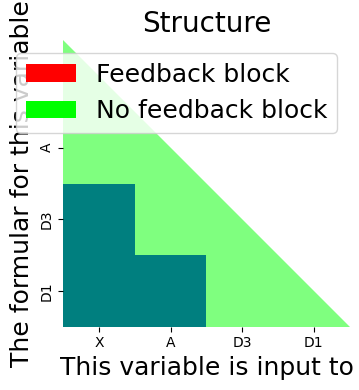

In [58]:
a = mn.draw_adjacency_matrix(mmodel.endograph,mmodel.strongorder,mmodel.strongblock,
                             mmodel.strongtype,size=(4,4))

### A topological sorted list of contemporaneous endogenous variables (the solve order) 
Also a property of the model 

In [59]:
mmodel.topo

['X', 'A', 'D3', 'D1']

### The dependency graph for contemporaneous endogenous variables, with feedback
Now lets look at another small model. This time with feedback. 

In [60]:
fms = '''
FRML xx Y  = C+I+E-M $ 
FRML xx C  = 0.9*Y+Y0 $ 
FRML xx C1 = 0.2*C $
FRML xx C2 = 0.2*C1 $
FRML xx M  = 0.1*Y + 0.2 * c $
FRML xx M1 = 0.2*M $
FRML xx E  = 0.1*E0 $
'''
mms = mc.model(fms)   # make a model instance 
mms.drawendo(size=(0.9,0.9))

### And the adjacency matrix of the graph 
When the model has contemporaneous feedback the TE will not be a DAG. There will be strong components with more than 1 node. This mean that the adjacency matix will have elements above the diagonal - like below. 

A graph where each strong component is condensed to a node will be a DAG. This can be calculated by ModelFlow. And the user can choose this as solving order. Else the model will be solved in the order in which the model is specified. 

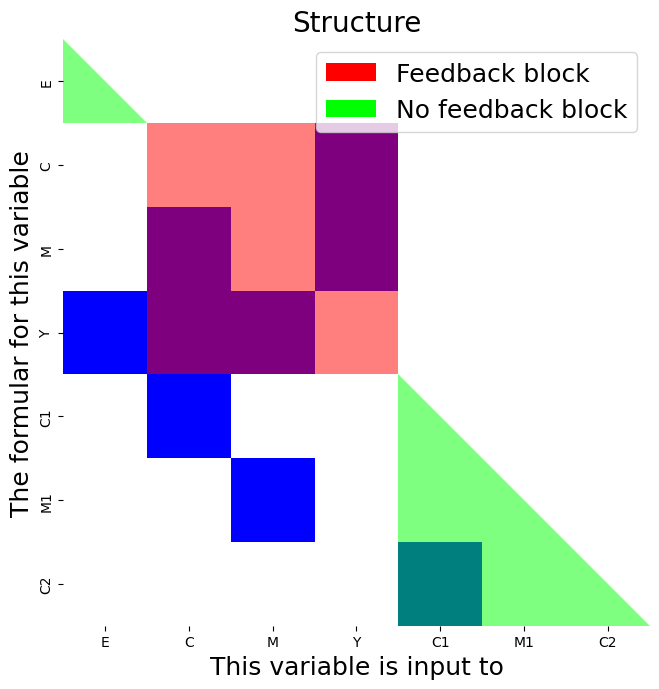

In [61]:
mms.plotadjacency(size=(7,7));

In [62]:
# the strong components of the model, DAG's (recursive elements) are condensed
print(f'Strong blocks         : {mms.strongblock}')
print(f'Type of strong blocks : {mms.strongtype}')

Strong blocks         : [['E'], ['C', 'Y', 'M'], ['C1', 'M1', 'C2']]
Type of strong blocks : ['Recursiv', 'Simultaneous', 'Recursiv']


## Solution ordering 

### For normalized models: 
For a model **without contemporaneous feedback**, the topoligical sorted order (mentioned abbove) is then used as calculating order. 

For a model **with contemporaneous feedback** and no leaded variables, ModelFlow divides a model into three parts. A recursive **prolog** model, a recursive **epilog** model, the rest is the simultaneous **core** model. Inside the core model the ordering of the equations are preserved.  It may be that the core model contains several strong componens, which eachcould be solved as a simultanous system, however it is solved as one simultanous system.  

Only the core model is solved as a simultaneous system. The prolog model is calculated once before the solving og the simultaneous system, the epilog model is calculated once after the solution of the simultanous system. 
For most models this significantly reduce the computational burden of solving the model. 

For Gauss type solution the ordering of the equations in the core model can be important for the speed of convergence. 

For a model with leaded variables the model is stacked, and a all  equations are created equal. For some models it could probably be useful split the model, but it has not been needed yes. 

The cell below displays the variables in the three parts.

In [63]:
# The preorder
print(f'The prolog variables {mms.preorder}')
print(f'The core   variables {mms.coreorder}')
print(f'The epilog variables {mms.epiorder}')

The prolog variables ['E']
The core   variables ['C', 'M', 'Y']
The epilog variables ['C1', 'M1', 'C2']


###  For un-normalized models: 
The models are solved as one simultanous model. Either by newton - if no leaded variables - or by stacked-newton if the model has leaded variables. 

## Construction of Jacobi matrices.
To use a Newton type solver the matrix ($\bf{A}$/$\bf{\bar A}$) the derivatives of all formulas with respect to all endogeneous variables is needed.    

$\bf{A}$  but especially $\bf{\bar A}$ can be quite large (more than $10.000 \times 10.000$). So it can look like a daunting task to find the all the values and solve the linear model. However for most economic models $\bf{A}$  is quite sparse, and by construct $\bf{\bar A}$ is very very sparse. Fortunately Python gives access to very efficient sparse libraries. The [Scipy library](https://scipy.org/scipylib/index.html) utilizes the [Intel® Math Kernel Library](https://software.intel.com/en-us/mkl).
First step is to create a new model which calculates the values for all the relevant derivatives. In ModelFlow this can be done by **symbolic**, by **numerical differentiation** or by a combination.  

This entails specifying a model in the business logic language which calculate all the non-zero elements of the $\bf{A}$/$\bf{\bar A}$ 

This is done by in the Newton class, which vil generate a new model instance which can perform the calculations of all the relevant derivatives (non zero derivatives). As an instance of the model class, it will have all the capabilities of this class. In the this derivative model the formula for calculating  $\dfrac{\partial{numerator }}{{\partial denominator(-lag)}}$ is written as:                             

\< numerator  \>\_\_p\_\_\< denominator >\_\_lag\_\_\< lag\> = derivative expression

### A small Solow model 
An example can be helpful 
First a small model is defined - in this case a solow growth model: 

In [64]:
fsolow = '''\
Y         = a * k**alfa * l **(1-alfa) 
C         = (1-SAVING_RATIO)  * Y 
I         = Y - C 
diff(K)   = I-depreciates_rate * K(-1)
diff(l)   = labor_growth * L(-1) 
K_i= K/L '''
msolow = model.from_eq(fsolow)
print(msolow.equations)

FRML <> Y         = A * K**ALFA * L **(1-ALFA)  $
FRML <> C         = (1-SAVING_RATIO)  * Y  $
FRML <> I         = Y - C  $
FRML <> K=K(-1)+(I-DEPRECIATES_RATE * K(-1))$
FRML <> L=L(-1)+(LABOR_GROWTH * L(-1))$
FRML <> K_I= K/L  $


### Create some data and solve the model 

In [65]:
N = 100
df = pd.DataFrame({'L':[100]*N,'K':[100]*N})
df.loc[:,'ALFA'] = 0.5
df.loc[:,'A'] = 1.
df.loc[:,'DEPRECIATES_RATE'] = 0.05
df.loc[:,'LABOR_GROWTH'] = 0.01
df.loc[:,'SAVING_RATIO'] = 0.05
msolow(df,max_iterations=100,first_test=10,silent=1);

### Create an diffirentiation instance of the model
Actually 2 instances are made, one which use symbolic differentiation one which use numerical differentiation.  

In [66]:
from modelnewton import newton_diff
msolow.smpl(3,4)  # we only want a few years 
newton = newton_diff(msolow)
newton2 = newton_diff(msolow,forcenum=1)

In [67]:
print(newton.diff_model.equations)

FRML  <> C__P__Y___lag___0 = 1-SAVING_RATIO   $
FRML  <> I__P__C___lag___0 = -1   $
FRML  <> I__P__Y___lag___0 = 1   $
FRML  <> K__P__I___lag___0 = 1   $
FRML  <> K__P__K___lag___1 = 1-DEPRECIATES_RATE   $
FRML  <> K_I__P__K___lag___0 = 1/L   $
FRML  <> K_I__P__L___lag___0 = -K/L**2   $
FRML  <> L__P__L___lag___1 = LABOR_GROWTH+1   $
FRML  <> Y__P__K___lag___0 = A*ALFA*K**ALFA*L**(1-ALFA)/K   $
FRML  <> Y__P__L___lag___0 = A*K**ALFA*L**(1-ALFA)*(1-ALFA)/L   $


In [68]:
print(newton2.diff_model.equations)

FRML  <> C__P__Y___lag___0 = (((1-SAVING_RATIO)*(Y+0.0025))-((1-SAVING_RATIO)*(Y-0.0025)))/0.005   $
FRML  <> I__P__C___lag___0 = ((Y-(C+0.0025))-(Y-(C-0.0025)))/0.005   $
FRML  <> I__P__Y___lag___0 = (((Y+0.0025)-C)-((Y-0.0025)-C))/0.005   $
FRML  <> K__P__I___lag___0 = ((K(-1)+((I+0.0025)-DEPRECIATES_RATE*K(-1)))-(K(-1)+((I-0.0025)-DEPRECIATES_RATE*K(-1))))/0.005   $
FRML  <> K__P__K___lag___1 = (((K(-1)+0.0025)+(I-DEPRECIATES_RATE*(K(-1)+0.0025)))-((K(-1)-0.0025)+(I-DEPRECIATES_RATE*(K(-1)-0.0025))))/0.005   $
FRML  <> K_I__P__K___lag___0 = (((K+0.0025)/L)-((K-0.0025)/L))/0.005   $
FRML  <> K_I__P__L___lag___0 = ((K/(L+0.0025))-(K/(L-0.0025)))/0.005   $
FRML  <> L__P__L___lag___1 = (((L(-1)+0.0025)+(LABOR_GROWTH*(L(-1)+0.0025)))-((L(-1)-0.0025)+(LABOR_GROWTH*(L(-1)-0.0025))))/0.005   $
FRML  <> Y__P__K___lag___0 = ((A*(K+0.0025)**ALFA*L**(1-ALFA))-(A*(K-0.0025)**ALFA*L**(1-ALFA)))/0.005   $
FRML  <> Y__P__L___lag___0 = ((A*K**ALFA*(L+0.0025)**(1-ALFA))-(A*K**ALFA*(L-0.0025)**(1-ALFA

### Display the full stacked matrix
To make the sparcity clear all zero values are shown as blank 


In [69]:
stacked_df = newton2.get_diff_df_tot()
stacked_df.applymap(lambda x:f'{x:,.2f}' if x != 0.0 else ' ')

per          3                                         4                       \
var          C      I      K    K_I      L      Y      C      I      K    K_I   
per var                                                                         
3   C    -1.00                               0.95                               
    I    -1.00  -1.00                        1.00                               
    K            1.00  -1.00                                                    
    K_I                 0.01  -1.00  -0.01                                      
    L                                -1.00                                      
    Y                   0.51          0.49  -1.00                               
4   C                                              -1.00                        
    I                                              -1.00  -1.00                 
    K                   0.95                               1.00  -1.00          
    K_I                                                           0.01  -1.00   
    L                                 1.01                                      
    Y                                                             0.51          

per                    
var          L      Y  
per var                
3   C                  
    I                  
    K                  
    K_I                
    L                  
    Y                  
4   C            0.95  
    I            1.00  
    K                  
    K_I  -0.01         
    L    -1.00         
    Y     0.49  -1.00

### Display the element of the sparse matrix

### The results can also be displayed in a more user friendly way

In [70]:
newton.show_diff_latex()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                     |    3 |    4 |
|:------------------------------------|-----:|-----:|
| $\frac{\partial C_t}{\partial Y_t}$ | 0.95 | 0.95 |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                         |    3 |    4 |
|:----------------------------------------|-----:|-----:|
| $\frac{\partial K_t}{\partial I_t}$     | 1    | 1    |
| $\frac{\partial K_t}{\partial K_{t-1}}$ | 0.95 | 0.95 |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                         |    3 |    4 |
|:----------------------------------------|-----:|-----:|
| $\frac{\partial L_t}{\partial L_{t-1}}$ | 1.01 | 1.01 |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                        |           3 |           4 |
|:---------------------------------------|------------:|------------:|
| $\frac{\partial K\_I_t}{\partial K_t}$ |  0.0097059  |  0.0096098  |
| $\frac{\partial K\_I_t}{\partial L_t}$ | -0.00943472 | -0.00925799 |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                     |   3 |   4 |
|:------------------------------------|----:|----:|
| $\frac{\partial I_t}{\partial C_t}$ |  -1 |  -1 |
| $\frac{\partial I_t}{\partial Y_t}$ |   1 |   1 |

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

|                                     |        3 |        4 |
|:------------------------------------|---------:|---------:|
| $\frac{\partial Y_t}{\partial K_t}$ | 0.507135 | 0.509412 |
| $\frac{\partial Y_t}{\partial L_t}$ | 0.492966 | 0.490762 |

## Speeding up solving through Just In Time compilation (Numba)
Python is an interpreted language. Therefor the calculation speed can be improved. There are several avenues to speed up calculations. 

Firstly, use the matrix extensions if possible. This will force the use of the highly optimized routines in the 
Numpy library. 

Secondly, python code can be compiled. The most straight forward way is to use the 
**Numba** library. For simultaneous models which only operates on numerical data the 
user can specify jit=1. This will engage the numba Just In 
Time Compiler and the model will solve significantly faster. However the compilation will 
take some time and for large models Numba will choke on the model. Experience with a Danish model (1700 equations) shows a speedup from 5 million floating point 
operations per second (MFlops) to 800 MFlops.  

Also experiments with the **Cython** library has been performed. This library will translate the Python code to C++ code. Then a C++ compiler can compile the code and the run time will be improved a lot. 

### Optimizing access to DataFrame values
**Execution speed is crucial.** Values in a DataFrame can be
accessed in a number of ways. Some are fast, others are not. Therefore, some care has been exercised
when accessing each value. 

If we have a DataFrame df and a column with the name 'FY', the value in 2018 can be
accessed like this: df.loc\[2018,'FY'\], This works fine for small models. However it is quite slow as the DataFrame
has to look up the position (row,column) of 2018 and 'FY' before it can
access the value in an underlying structure. When looking for the value for 2019 the Dataframe again has to to the lookup. 

When calculating simple (non simultaneous) models, the row and column of each value is
resolved before the code generation and the value is accessed directly
in an underlying property of dataframes  called values. So if FY is the 42 column of the DataFrame and the position of 2018 is assigned to the variable row. The value is accessed as df.values\[row,42\]. In this case no time is wasted for looking up the row and column of the position.  

When using the iterative Gauss-Seidel solution method, all necessary
values are transferred to a one-dimensional numpy calculation array - called a. So the value would just be accessed like: a\[84\]. This requires some overhead to stuff and unstuff the values from df. But data access is faster, as accessing elements in a one-dimensional array
is faster than in a two-dimensional array. Also, the locality of data is
increased, thus the chance of a cache miss is reduced. This is especially important if the model is compiled. 

# Some Model manipulation capabilities  

## Model inversion aka Target/instruments or Goal Seek 
In ordet to answer questions like: 

- How much capital has to be injected in order to maintain a certain GDP level in a stressed scenario? 
- How much loans has to be shredded by the banks in order to maintain a minimum level of capital (slim to fit)? 
- How much capital has to be injected in order to keep all bank above a certain capital threshold ?

The model instance is capable to **"invert"** a model. To use the terminology of Tinbergen(1955) that is to calculate the value of some exogenous variables - **the instruments** which is required in order to achieve a certain target value for some endogenous variables - **the targets**. 

To use the terminology of Excel it is a goal/seek functionality with multiple cells as goals and multiple cells as targets.  

The problem can be thought as follows: From the generic description of a model: $\textbf{y}_t= \textbf{F}(\textbf{x}_{t})$. Here $\textbf{x}_{t}$ are all predetermined variables - lagged endogenous and all exogenous variables. 

In some models the result depends on the level of exogenous variables with a lag. For instance in a disease spreading model, the *number of infected* on a day depends on the *probability of transmission* some days before. If the *probability of transmission* is the instrument and the *number of infected* is the target. Therefor it can be useful to allow a **delay**, when finding the instruments. In this case we want to look at  $\textbf{y}_t= \textbf{F}(\textbf{x}_{t-delay})$ 

Think of a condensed model ($\textbf{G}$) with a few endogenous variables($\bar{\textbf{y}}_t$):
the targets and a few exogenous variables($\bar{\textbf{x}}_{t-delay}$): the instrument variables. All the rest of the predetermined variables are fixed:  
$\bar{\textbf{y}}_t= \textbf{G}(\bar{\textbf{x}}_{t-delay})$

If we invert G we have a model where  instruments are functions of targets:
$\bar{\textbf{x}_{t-delay}}= \textbf{G}^{-1}(\bar{\textbf{y}_{t}})$. Then all we have to do is to find
$\textbf{G}^{-1}(\bar{\textbf{y}_{t}})$

### And how to solve for the instruments 
For most models $\bar{\textbf{x}}_{t-delay}= \textbf{G}^{-1}(\bar{\textbf{y}_{t}})$ do not have a nice close form solution. However it can be solved numerically. We  turn to Newton–Raphson method.

So $\bar{\textbf{x}}_{t-delay}= \textbf{G}^{-1}(\bar{\textbf{y}_{t}^*})$ will be found using :

for $k$ = 1 to convergence  

>$\bar{\textbf{x}}_{t-delay,end}^k= \bar{\textbf{x}}_{t-delay,end}^{k-1}+ \textbf{J}^{-1}_t \times (\bar{\textbf{y}_{t}^*}-
\bar{\textbf{y}_{t}}^{k-1})$

>$\bar{\textbf{y}}_t^{k}= \textbf{G}(\bar{\textbf{x}}_{t-delay}^{k})$

convergence: $\mid\bar{\textbf{y}_{t}^*}-
\bar{\textbf{y}_{t}}
\mid\leq \epsilon$

Now we just need to find: 

$\textbf{J}_t = \frac{\partial \textbf{G} }{\partial \bar{\textbf{x}}_{t-delay}}$

A number of differentiation methods can be used (symbolic, automated or numerical). ModelFlow uses numerical differentiation, as it is quite simple and fast.

$\textbf{J}_t \approx \frac{\Delta \textbf{G} }{\Delta \bar{\textbf{x}}_{t-delay}}$

That means that we should run the model one time for each instrument, and record the 
effect on each of the targets, then we have $\textbf{J}_t$ 

In order for $\textbf{J}_t$ to be invertible there has to be the same number of targets and instruments. 

However, each instrument can be a basket of exogenous variable. They will be adjusted in fixed proportions. This can be useful for instance when using bank leverage as instruments. Then the leverage instrument can consist of several loan types.  

You will notice that the level of $\bar{\textbf{x}}$ is updated (by  $\textbf{J}^{-1}_t \times (\bar{\textbf{y}_{t}^*}-
\bar{\textbf{y}_{t}}^{k-1})$) in all periods from $t-delay$ to $end$, where $end$ is the last timeframe in the dataframe. This is useful for many applications including calibration of disease spreading models and in economic models, where the instruments are level variable (i.e. not change variables). If this is not suitable, it can be changed in a future release. 

The target/instrument functionality is implemented in the python class `targets_instruments` specified in **ModelFlows** `modelinvert` module.  

### An example
The workflow is as follow:

1.  Define the targets
2.  Define the instruments 
3.  Create a target_instrument class istance
4. Solve the problem 

Step one is to define the targets. This is done by creating a dataframe where the target values are set. In this case it can be done like this. 

In [71]:
mmodel.basedf

,B,C,E,X,D3,A,D1
2018,1.0,1.0,4.0,0.0,0.0,0.0,0.0
2019,1.0,2.0,4.0,1.0,9.0,2.0,7.0
2020,1.0,3.0,4.0,1.5,34.5,3.0,19.5
2021,1.0,6.0,4.0,3.0,228.0,4.0,52.0


In [72]:
target = mmodel.basedf.loc[2020:,['D3','D1']]+[1,10]
target

,D3,D1
2020,35.5,29.5
2021,229.0,62.0


Then we have to provide the instruments. This is **a list of list of tuples**. 
-  Each element in the outer list is an instrument. 
-  Each element in the inner list is an instrument variable 
-  Each element of the tuple contains a variable name and the associated impulse $\Delta$. 

The $\Delta variable$ is used in the numerical differentiation. Also if one instrument contains several variables, the proportion of each variable will be determined by the relative $\Delta  variable$. 

For this experiment the inner list only contains one variable. 

In [73]:
instruments = [ [('C',1)] , [('B',1)]]

Now we run the eksperiment 

For models which are relative linear we don't need to update  𝐉𝑡  for each iteration and time frame. As our small toy model is nonlinear, the jacobi matrix has to be updated frequently. This is controlled by the nonlin=True option below.

In [74]:
try:
    result = mmodel.invert(mmodel.lastdf,target,instruments,nonlin=True)
    result
except:
    print('check this')

Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 


Finding instruments :   0%|          | 0/2

Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved
My first model calculated 
Will start calculating: My first model
2020  solved


And do the result match the target?

In [75]:
try: 
    result-target
except: 
    print('Something went wrong')

Something went wrong


So we got results for the target variable very close to the target values. 

### Shortfall targets
Above the target for each target variable is a certain values. Sometime we we need targets being above a certain shortfall value. In this case an instrument should be used to make the achieve the target threshold only if the target is belove the target. This is activated by an option:**shortfall=True**.

This feature can be useful calculating the amount of deleverage needed for banks to achieve a certain threshold of capital. 

## Attribution / Explanation 

Experience shows that it is useful to be able to explain the difference between the result from two runs. 
The first level of understanding the difference is to look at selected formulas and find out, how much each input variables accounts for. 
The second level of understanding the difference is to look at the attribution of the 
exogenous variables to the results of the model.  

If we have:

$y = f(a,b)$

and we have two solutions where the variables differs by $\Delta y, \Delta a, \Delta b$

How much of $\Delta y$ can be explained by $\Delta a$ and $\Delta b$ ?

Analytical the attributions $\Omega a$ and $\Omega b$ can  be calculated like this: 

$\Delta y = \underbrace{\Delta a \dfrac{\partial {f}}{\partial{a}}(a,b)}_{\Omega a} + 
\underbrace{\Delta b \dfrac{\partial {f}}{\partial{b}}(a,b)}_{\Omega b}+Residual$

ModelFlow will do a numerical approximation of $\Omega a$ and $\Omega b$. This is done by looking at the two runs of the model:

\begin{eqnarray}  
y_0&=&f(a_{0},b_{0}) \\
y_1&=&f(a_0+\Delta a,b_{0}+ \Delta b)
\end{eqnarray}

So $\Omega a$ and $\Omega b$ can be determined:

\begin{eqnarray}  
\Omega f_a&=&f(a_1,b_1 )-f(a_1-\Delta a,b_1) \\
\Omega f_b&=&f(a_1,b_1 )-f(a_1,b_1-\Delta  b)
\end{eqnarray}



And: 

\begin{eqnarray}
residual = \Omega f_a + \Omega f_b -(y_1 - y_0) 
\end{eqnarray}
If the model is fairly linear, the residual will be small. 

### Formula attribution
Attribution analysis on the formula level is performed by the method **.dekomp**. 

This method utilizes that two attributes .basedf and .lastdf containing the first and the last run are contained in the model instance. Also all the formulas are contained in the instance. Therefore a model, just with one formula - is created. Then experiments mentioned above is run for each period and each right hand side variable. 

In [76]:
_ = mmodel.dekomp('D1')


Formula        : FRML <> D1 = X + 3 * A(-1)+ C **2 +A  $ 

                      2020
Variable    lag           
Base        0        19.50
Alternative 0        78.50
Difference  0        59.00
Percent     0       302.56

 Contributions to differende for  D1
                   2020
Variable lag           
X         0        2.00
A        -1       12.00
C         0       40.00
A         0        5.00

 Share of contributions to differende for  D1
                    2020
Variable lag            
C         0          68%
A        -1          20%
          0           8%
X         0           3%
Total     0         100%
Residual  0          -0%

 Difference in growth rate D1
                       2020
Variable    lag            
Base        0        178.6%
Alternative 0        134.3%
Difference  0        -44.2%
None

 Contribution to growth rate D1
                    2020
Variable lag            
X         0         6.0%
A        -1        35.8%
C         0       119.4%
A         0    

If the baseline dataframe is set to the lagged variable of the last dataframe. We can 
calculate the attributions to the change of results from time period to time period. 

### Walk the explanations. 
Sometime we want to trace the attributions to variables in higher in the dependency graph. 

Using the dependency graph TG, we can walk up the graph, and do an attribution calculation for each of the parents, grand parents and so on. 

It should be mentioned that for *lagged* endogenous variable an attribution calculation will not be performed.  

So we use the **.explain** method. 

The result will also be made into a vector graphic both in .pdf and .svg format. This allows for zooming into the tree, even if there are many leaves.   

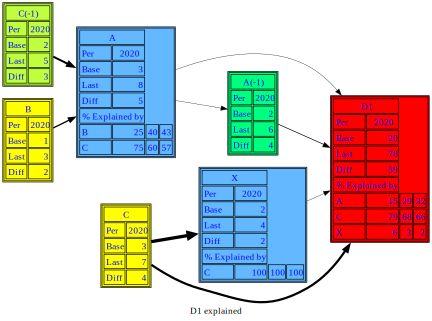

In [77]:
_ = mmodel.D1.explain(up=2)

### Model Attribution

At the model level we start by finding which exogenous variables have changed between two runs.

In [78]:
difdf = mmodel.exodif()
difdf

,B,C
2018,0.0,3.0
2019,1.0,3.0
2020,2.0,4.0
2021,3.0,3.0


Now we make a dictionary of experiments where the key is the name of the
experiment and the value of each entry is the variable to investigate in the experiment 

In [79]:
experiments = {e : [e]  for e in difdf.columns}
experiments 

{'B': ['B'], 'C': ['C']}

Then we can let the model run through each experiment and record a number of summary
variable.  

In [80]:
impact = md.attribution(mmodel,experiments,start=2019,end=2021,summaryvar=['D*'])
impact

0 Experiment : B 
 Touching: 
 ['B']
1 Experiment : C 
 Touching: 
 ['C']


B                C              
   2019 2020 2021   2019   2020   2021
D1  1.0  5.0  9.0   25.5   54.0   59.5
D3  0.0  3.0  6.0  118.5  327.0  523.5

In [81]:
impact['C',2021]

D1     59.5
D3    523.5
Name: (C, 2021), dtype: float64

In [82]:
for sumaryvar in impact.index:
    mv.attshow(md.GetAllImpact(impact, sumaryvar),tshow=0,t=False,annot=True,dec=1,
               title='Impact on: '+sumaryvar,size=(3,3),showsum=True,head=1,tail=1)

When the results are displayed, they can be filtered, sliced and diced in a number of ways. 

For a model of the EBA stress test the number of changed exogenous variable can be large. Using a dictionary to contain the experiments allows us to create experiments where all variable for each country are analyzed, or each macro variable for all countries are analyzed. 

Also it is possible to use aggregated sums - useful for looking at impact on PD's. Or just the last time period - useful for looking at CET1 ratios. 

If there are many experiments, data can be filtered in order to look only at the variables with an impact above a certain threshold. 

The is also the possibility to anonymize the row and column names and to randomize
the order of rows and/or columns - useful for bank names. 

## Optimization 
Using the convex optimization package CVXOPT, which is part of the Anaconda Python distribution a range of optimization problems can be solved. One example is the standard mean variance problem. 

### A mean variance problem

If we look at a fairly general mean variance optimization problem which has been adopted to banks it looks like this:  

\begin{eqnarray}  
\mathbf x & &\mbox{Position in each asset(+)/liability(-) type}\\
\mathbf x & &\mbox{Position in each asset(+)/liability(-) type}\\
\mathbf \Sigma & &\mbox{Covariance matrix} \\
\mathbf r & &\mbox{Return vector}\\
\lambda & &\mbox{Risk aversion}\\
\mathbf{riskweights}& &\text{Vector of risk weights, liabilities has riskweight = 0}\\
Capital& &\mbox{Max of sum of risk weighted assets}\\
\mathbf{lcrweights}& &\text{Vector of LCR weights, liabilities has lcrweight = 0}\\
LCR& &\text{Min of sum of lcr weighted assets}\\
\mathbf{leverageweight}&&\text{Vector of leverage weights, liabilities has leverageweight = 0}\\
Equity&&\mbox{Max sum of leverage weighted positions}\\
Budget&&\mbox{initial sum of the positions}\\
\end{eqnarray}

\begin{eqnarray}
\mbox{minimize:}  & \lambda \mathbf x^T \mathbf \Sigma \mathbf x - (1-\lambda) \mathbf r^T \mathbf x & \mbox{If }\lambda \mbox{ = 1 minimize risk, if } \lambda\mbox{ = 0 maximize return }\\
\mbox{subject to:} & \mathbf x \succeq \mathbf{x^{min}} &\mbox{Minimum positions}\\ 
                   & \mathbf x \preceq \mathbf{x^{max}} &\mbox{Maximum positions}\\ 
                   & \mathbf{riskweights}^T\mathbf x \leq Capital &\mbox{Risk weighted assets <= capital}\\ 
                   & \mathbf{lcrweights}^T\mathbf x \geq LCR &\mbox{lcr weighted assets >= LCR target}\\ 
                   & \mathbf{leverageweight}^T\mathbf x \leq equity &\mbox{leverage weighted assets <= equity}\\ 
                   & \mathbf 1^T\mathbf x = Budget & \mbox{Sum of positions = B}
\end{eqnarray}


### The mean variance problem in the business language language 

In the business logic language this problem can be specified like this:

``` 
positions =  mv_opt(msigma,return,riskaversion, budget, 
            [[risk_weights] , [-lcr_weights] , [leverage_weights]],
              [capital, -lcr , equity] ,min_position,max_position) 
```

Where the arguments are appropriately dimensioned CVX matrices and vectors. 

For a more elaborate example there is an special notebook on the subject of optimization.

Also it should be mentioned that there is an expansion of the basic problem taking transaction cost into account. 


## Symbolic model differentiation 
ModelFlow have the capability to calculate expressions for differentiation of the formulas 
of a model. This is done by the Python symbolic math library **Sympy**. After finding the 
expressions for the differential coefficients they can be evaluated - just like the model. Based on these a linearized 
version of the model can be constructed. 

We want to be able to find he Jacobi matrices:

\begin{eqnarray}  
\textbf{A} & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_t^T} \\ \\
\textbf{E}_i & = & \frac{\partial \textbf{F}}{\partial \textbf{y}_{t-i}^T } \hspace{5 mm} i=1, \cdots , s \\ \\
\textbf{F}_j & = & \frac{\partial \textbf{F}}{\partial \textbf{x}_{t-j} ^T} \hspace{5 mm} j=0, \cdots , r  
\end{eqnarray}

These matrices can be useful when finding stability properties. 

Now lets differentiate our toy model 

In [83]:
mdif.modeldiff(mmodel)

Now differentiating X 0
Now differentiating D3 1
Now differentiating A 2
Now differentiating D1 3
Find espressions for partial derivatives took       :         0.0089981556 Seconds
Model                           : My first model
Number of variables             : 6
Number of endogeneus variables  : 4
Number of derivatives           : 5


Now we can display the expressions for the differential coefficient - and the values in a selected time (row), in this case 2018.

In [84]:
mdif.display_all(mmodel,mmodel.basedf,2018)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Also the matrices of differential coefficient (Jacobi matrices) for each lag, can be calculated

In [85]:
# calculate 
matdir = mdif.calculate_allmat(mmodel,mmodel.basedf,2018)
# Display 
for l,m in matdir.items():
    print(f'Lag:{l} \n {m} \n')

Lag:0 
     A  D1  D3  X  B  C
A   0   0   0  0  0  0
D1  1   0   0  1  0  0
D3  0   0   0  1  0  0
X   0   0   0  0  0  0 

Lag:-1 
     A  D1  D3  X  B  C
A   0   0   0  0  0  0
D1  3   0   0  0  0  0
D3  3   0   0  0  0  0
X   0   0   0  0  0  0 



C:\modelflow2\modelflow\modeldiff.py:289: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ud.loc[prow,pcol] =  model.diffvalue_d3d[lag][prow][pcol]
C:\modelflow2\modelflow\modeldiff.py:289: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ud.loc[prow,pcol] =  model.diffvalue_d3d[lag][prow][pcol]
C:\modelflow2\modelflow\modeldiff.py:289: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ud.loc[prow,pcol] =  model.diffvalue_d3d[lag][prow][pcol]
C:\modelflow2\modelflow\modeldiff.py:289: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ud.loc

We can carve out the matrices only for the endogenous variables. The A and E matrices mentioned above 
can be extracted like this: 

In [86]:
for l,m in matdir.items():
    endomat = m.loc[:,[c for c in m.columns if c in mmodel.endogene]]
    print(f'Lag:{l} \n {endomat} \n')

Lag:0 
     A  D1  D3  X
A   0   0   0  0
D1  1   0   0  1
D3  0   0   0  1
X   0   0   0  0 

Lag:-1 
     A  D1  D3  X
A   0   0   0  0
D1  3   0   0  0
D3  3   0   0  0
X   0   0   0  0 



A word of caution. 

Symbolic math can take time if the model is large. So it is advisable to test this feature on a small model which 
captures the essence before moving to a large model. 

Also the Sympy library will only handle functions and expressions that it knows.  

## Stability
Jacobi matrices can be used to evaluate the stability properties of the model. To do this we first look at a linearized version of the model. We are interested in the effect of shocks to the system. Will shocks be 
damped or will they be amplified. 

To calculate the effect of small perturbations the model can be linearized around a solution

\begin{eqnarray*}  
\Delta y_t & = & A \Delta y_t + E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F_0 \Delta x_t  + \cdots +F_s \Delta x_{t-s} \\
I\Delta y_t-A \Delta y_t & = &  \hphantom{A \Delta y_t +}E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F _0\Delta x_t   + \cdots +F_s \Delta x_{t-s} \\  
(I-A)\Delta y_t & =  &  \hphantom{A \Delta y_t +}E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F_0 \Delta x_t  + \cdots +F_s \Delta x_{t-s} \\ 
\Delta y_t & =  & (I-A)^{-1}(E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F_0 \Delta x_t  + \cdots +F_s \Delta x_{t-s}) \\
\Delta y_t           & =  & (I-A)^{-1}E_1 \Delta y_{t-1} + \cdots +(I-A)^{-1}E_r \Delta y_{t-r} + (I-A)^{-1}F_0 \Delta x_t  + \cdots +(I-A)^{-1}F_s \Delta x_{t-s} \\
\end{eqnarray*}



\begin{eqnarray*}  
y_t & = & F(y_t \cdots y_{t-r},x_t \cdots x_{t-s})     \\
\Delta y_t & =  & (I-A)^{-1}E_1 \Delta y_{t-1} + \cdots +(I-A)^{-1}E_r \Delta y_{t-r} + (I-A)^{-1}F_0 \Delta x_t  + \cdots +(I-A)^{-1}F_s \Delta x_{t-s}
\end{eqnarray*}

where:

\begin{eqnarray*}
A & = & \frac{\partial F}{\partial y_t^T} \\ \\
E_i & = & \frac{\partial F}{\partial y_{t-i}^T } \hspace{5 mm} i=1, \cdots , r\\  \\
F_j & = & \frac{\partial F}{\partial x_{t-j} ^T} \hspace{5 mm} j=0, \cdots , s\\  \\
\end{eqnarray*}



We have

\begin{eqnarray*}  
y_t & = & F(y_t \cdots y_{t-r},x_t \cdots x_{t-s})     \\
\Delta y_t & =  & (I-A)^{-1}E_1 \Delta y_{t-1} + \cdots +(I-A)^{-1}E_r \Delta y_{t-r} + (I-A)^{-1}F_0 \Delta x_t  + \cdots +(I-A)^{-1}F_s \Delta x_{t-s} \\
\end{eqnarray*}

A rather messy problem. It can be made more simple. This is done by making a new linear model only incorporating 
variables with one lag. 

This is done the standard way by introducing new variables: $y^{1 }_{t}=y_{t-1}$,
$y^{2}_{t}=y^1_{t-1}$,  and $y^{3}_{t}=y^2_{t-1}$ Using theese transformed variables, 
a system with max lag of 3 can e rewritten like this: 

$\underbrace{
\left[\begin{matrix}
\Delta y^{3} _{t}\\\Delta y^{2 }_{t}\\\Delta y^{1 }_{t}\\\Delta y_{t}
\end{matrix}\right]}_{\Delta \bar y_t }=
\underbrace {\left[\begin{matrix}{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\{0} & {0} & {0} & A\end{matrix}\right]}_{\bar A} 
\underbrace{\left[\begin{matrix}
\Delta y^{3} _{t}\\\Delta y^{2 }_{t}\\\Delta y^{1 }_{t}\\\Delta y_{t}
\end{matrix}\right]}_{\Delta \bar y_t} +
\underbrace{\left[\begin{matrix}{0} & \mathbb{I} & {0} & {0}\\{0} & {0} & \mathbb{I} & {0}\\{0} & {0} & {0} & \mathbb{I}\\{0}&E_{3} & E_{2} & E_{1}  \end{matrix}\right]}_{\bar E}
\underbrace{\left[\begin{matrix}
\Delta y^{3} _{t-1}\\\Delta y^{2 }_{t-1}\\\Delta y^{1 }_{t-1}\\\Delta y^{ }_{t-1}
\end{matrix}\right]}_{\Delta \bar y_{t-1}} +
\underbrace {\left[\begin{matrix}{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\F_{3} & F_{2} & F_{1} & F_{0}\end{matrix}\right]}_{\bar F}
\underbrace   {\left[\begin{matrix}\Delta x_{t-3}\\\Delta x_{t-2}\\\Delta x_{t-1}\\\Delta x_{t\hphantom{-1}}\end{matrix}\right]}_{\bar x_t}$



So this expression:

$\Delta y_t  =  A \Delta y_t + E_1 \Delta y_{t-1} + \cdots +E_r \Delta y_{t-r} + F_0 \Delta x_t  + \cdots +F_r \Delta x_{t-r}$


Has been simplified to this expression :

$\Delta \bar y_t  =  \bar A \Delta \bar y_t + \bar E \Delta \bar y_{t-1} + \bar F \Delta \bar x_t$


It can be solved, so we only get the: $\Delta \bar y_t$ on the left hand side:

$\Delta \bar y_t  =   (I-\bar A)^{-1}\bar E \Delta \bar y_{t-1} + (I-\bar A)^{-1}\bar F \Delta \bar x_t$

$\mbox{This expression :} \\\Delta \bar y_t  =   (I-\bar A)^{-1}\bar E \Delta \bar y_{t-1} + (I-\bar A)^{-1}\bar F \Delta \bar x_t$ 

Which can be written this way:

$\underbrace{\left[\begin{matrix}
\Delta y^{3} _{t}\\\Delta y^{2}_{t}\\\Delta y^{1}_{t}\\\Delta y_{t}
\end{matrix}\right]}_{\Delta \bar y_t}=
\underbrace{\left[
\begin{matrix}{0} & \mathbb{I} & {0} & {0}\\{0} & {0} & \mathbb{I} & {0}\\{0} & {0} & {0} & \mathbb{I}\\ {0} & \left(\mathbb{I} - A\right)^{-1} E_{3} & \left(\mathbb{I} -A\right)^{-1} E_{2} & \left(\mathbb{I}- A\right)^{-1} E_{1}  \end{matrix}
\right]}_{ \mbox{companion matrix}=(I-\bar A)^{-1}\bar E}
\underbrace{\left[\begin{matrix}
\Delta y^{3} _{t-1}\\\Delta y^{2 }_{t-1}\\\Delta y^{1 }_{t-1}\\\Delta y^{ }_{t-1}
\end{matrix}\right]}_{\Delta \bar y_{t-1}}
+ \\
\underbrace{\left[\begin{matrix}{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\{0} & {0} & {0} & {0}\\\left(\mathbb{I} - A\right)^{-1} F_{3} & \left(\mathbb{I} - A\right)^{-1} F_{2} & \left(\mathbb{I} - A\right)^{-1} F_{1} & \left(\mathbb{I} - A\right)^{-1} F_{0}\end{matrix}\right]}_{(I-\bar A)^{-1}\bar F} 
\underbrace{\left[\begin{matrix}\Delta x_{t-3}\\\Delta x_{t-2}\\\Delta x_{t-1}\\\Delta x_{t\hphantom{-1}}\end{matrix}\right]}_{\Delta \bar x_t}$

So now we have a linear model with only one lag. For this kind of models the dynamic behavior can be 
evaluated by looking at the eigenvalues $e_t$ of $((I-\bar A)^{-1}\bar E )$ 

If all $\lvert e_t \lvert < 1$ the system will converge. If at least one of the eigenvalues is larger than one, the system will explode. $e_t$ can are complex numbers. If at least one $e_t$ has an imaginary part the system will oscillate - either dampened if all $\lvert e_t \lvert < 1$ or exploding if one $\lvert e_t \lvert > 1$.

The eigenvalues and associated eigenvectors can be found by the function mdif.get_eigen which will be used below.

### Example: Samuelson multiplier accelerator model 
To illustrate the feature this small classic model is created in a function which will display the results and a polar plot of the complex eigenvalues. 

Then experiment with different parameter values are performed in order to establish if shocks are 
amplified or dampened and if shocks will induce oscillations or not. 

In [87]:
model

modelclass.model

In [88]:
def geteigen(mul,acc,years=100,show=False):
    '''Function which creates a Samuelson Multiplier accelerator model, runs it
    and alculates the eigenvalues for the compaignion matrix in order to 
    evaluate stability. 
    
    A polar plot of the compex eigenvalues and graphs of the endogenous variables can 
    be displayes '''
    
    fam   = f'''
    frml <>  y = c+i $ 
    frml <I> c = {mul} * y(-1) $
    frml <>  i = {acc} * (c-c(-1)) + im $'''

    mma = mc.model(fam,modelname = 'Accelerator multiplicator model')
    df = pd.DataFrame([[1000,200]]*years,index=range(2018,2018+years),columns=['Y','IM'])
    start = mc.model(f'c = {mul} * y(-1)')(df,silent=True) # Generate lagged variables for c 
    base  = mma(start,silent=True)     # Solve the model 

    compeig=mdif.get_eigen(mma,base,2021)       # find the eigenvalues and eigenvectors 
    if show:
        print('hello')
        mdif.eigplot(compeig[0])        # show the eigenvalues 
        _ = mma[['Y','C','I']].plot()  # Show the solution
        
    return  

In [96]:
def geteigen(mul,acc,years=100,show=False):
    '''Function which creates a Samuelson Multiplier accelerator model, runs it
    and alculates the eigenvalues for the compaignion matrix in order to 
    evaluate stability. 
    
    A polar plot of the compex eigenvalues and graphs of the endogenous variables can 
    be displayes '''
    
    fam   = f'''
    frml <>  y = c+i $ 
    frml <I> c = {mul} * y(-1) $
    frml <>  i = {acc} * (c-c(-1)) + im $'''

    mma = mc.model(fam,modelname = 'Accelerator multiplicator model')
    df = pd.DataFrame([[1000,200]]*years,index=range(2018,2018+years),columns=['Y','IM'])
    start = mc.model(f'c = {mul} * y(-1)')(df,silent=True) # Generate lagged variables for c 
    base  = mma(start,silent=True)     # Solve the model 

    # compeig=mma.get_eigen(mma,base,2021)       # find the eigenvalues and eigenvectors 
    if show:
        print('hello')
        mma.eigenvalues_plot(2021,progressbar=False)      # show the eigenvalues 
        _ = mma[['Y','C','I']].plot()  # Show the solution
        display(_)
        
    return  

In [97]:
2+2

4

#### Stability  
All eigenvalues shorter than 1 and no imaginary parts 

hello
Finding eigenvalues and vectors


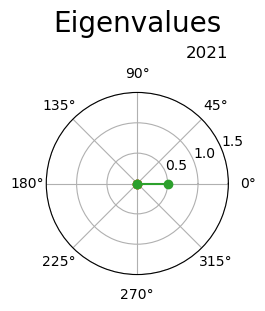

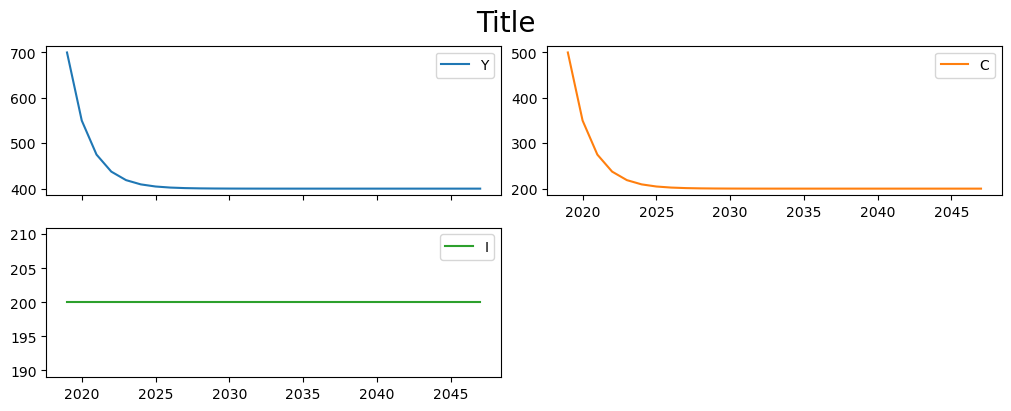

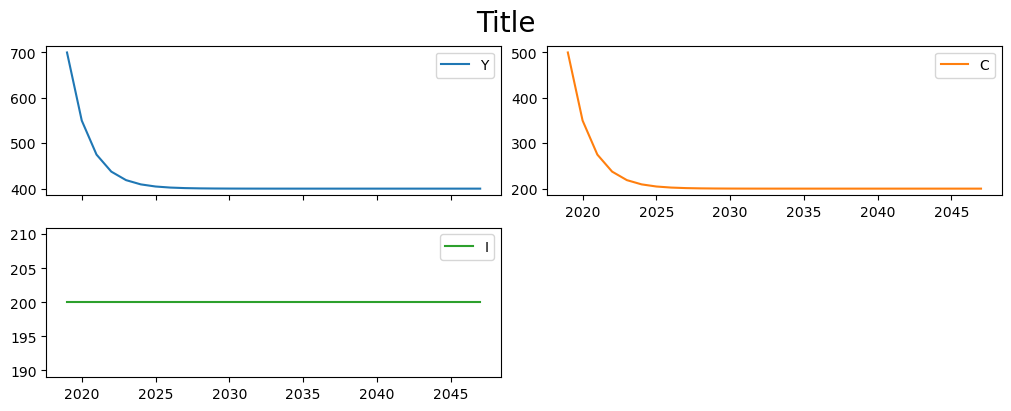

In [98]:
geteigen(mul=0.5,acc=0,years=30,show=1)

#### Explosion 
At least one eigenvalues above 1 no imaginary part

hello
Finding eigenvalues and vectors


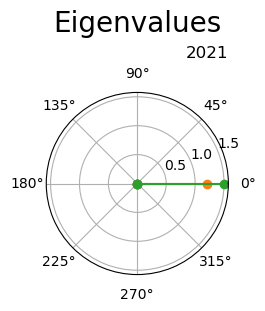

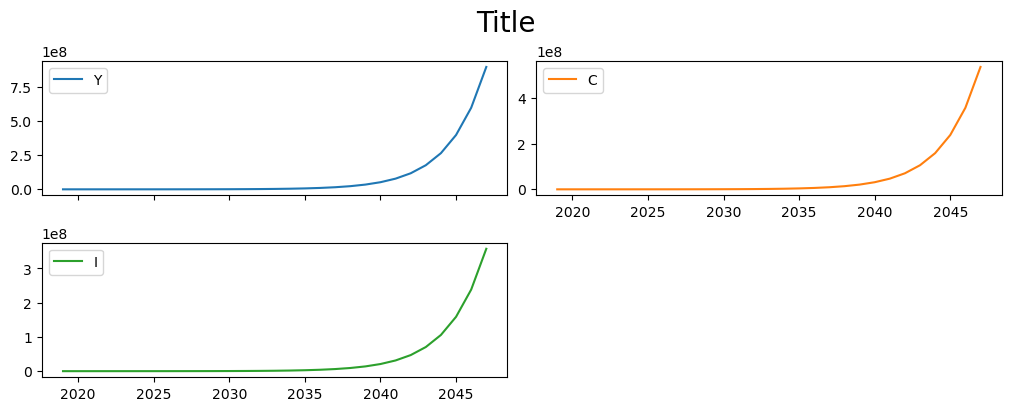

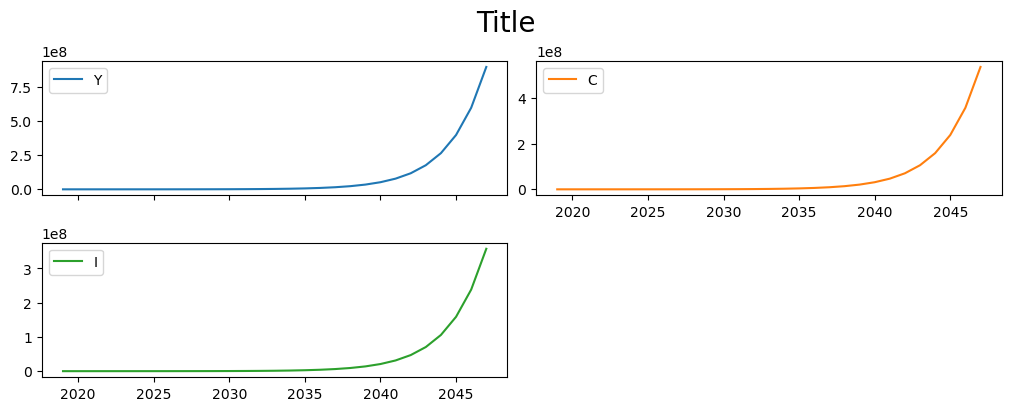

In [99]:
geteigen(mul=0.9,acc=2,years=30,show=1)

#### Exploding oscillations
At least one eigenvalue above 1 and imaginary parts

hello
Finding eigenvalues and vectors


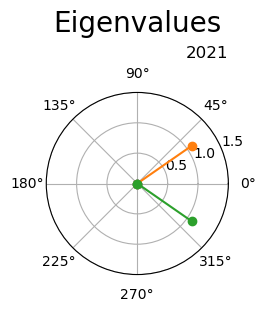

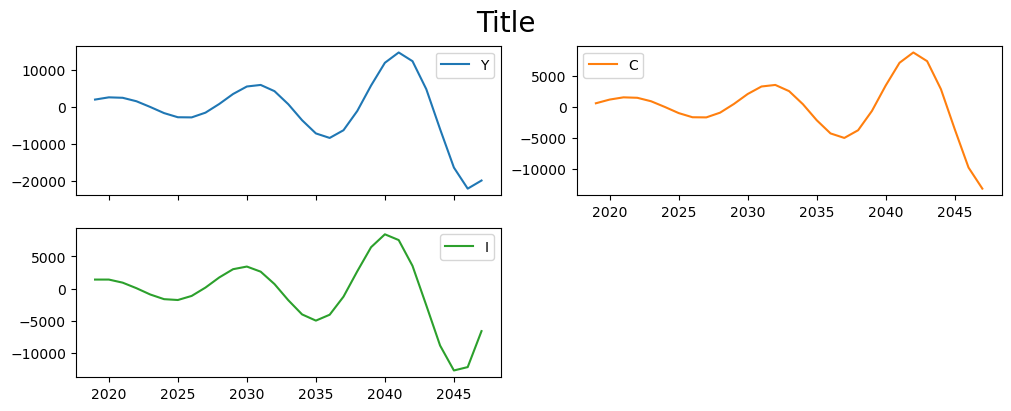

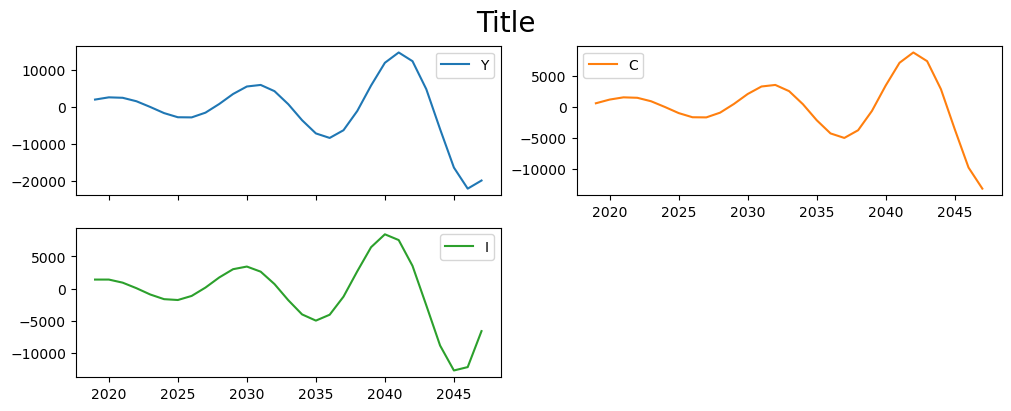

In [100]:
geteigen(mul=0.6,acc=2,years=30,show=1)

#### Perpetual oscillations 
Eigenvalues at 1 with imaginary part

In [ ]:
geteigen(mul=0.5,acc=2,years=30,show=1)

#### Dampened oscillations 
All eigenvalues below 1 and imaginary parts

hello
Finding eigenvalues and vectors


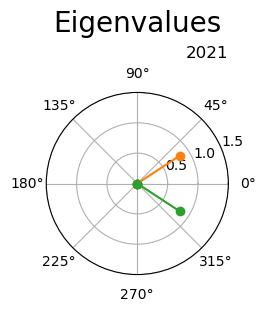

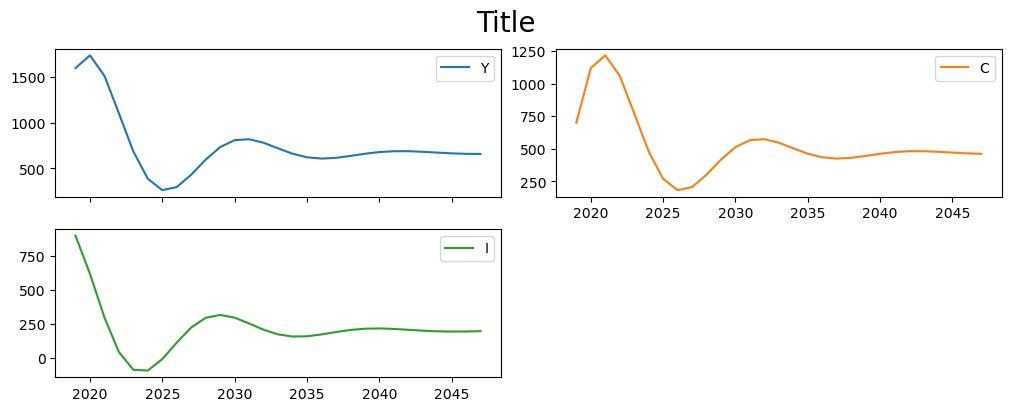

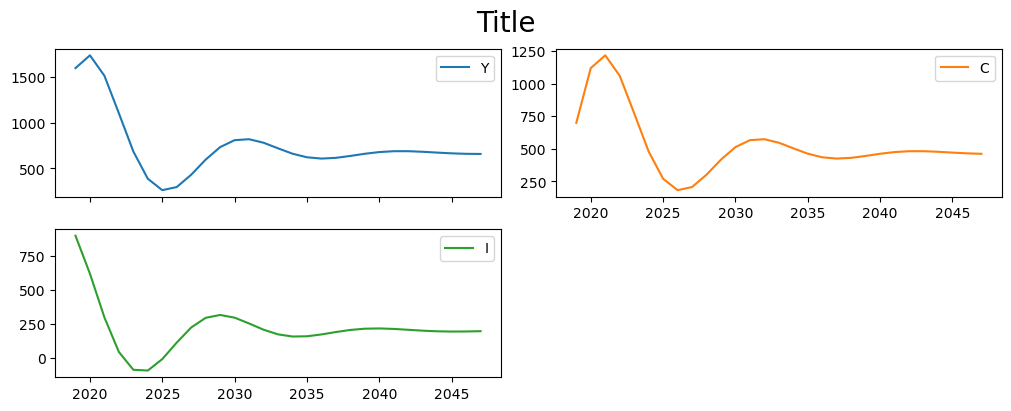

In [101]:
geteigen(mul=0.7,acc=1,years=30,show=1)

Using this feature. ModelFlow can be used to analyze how different feedback parameters will impact stability.
Of cause it requires that the model is differentiable, and for large models the analysis can take time and a lot of RAM.  

# Onboarding data 
The Pandas library really shines when it comes to retrieving and wrangling data. How to get data on board is very specific for each model and data source. There are many great books on using Pandas for data wrangling. So it is beyond the scope of this notebook to go into details on this subject. However, it is useful to go through some naming advice and a broad description of how data can be transformed to the right format.  

ModelFlow need to get the data as a wide Pandas DataFrame. Each row is one time frame. Each columns s a variable. 

There are no limits to the length of column names. Therefor column names can be constructed meaningful. a column name should start with a letter then it can be followed by any numbers of letters, digits or \_. Letters have to be upper case. If lower case letters are used in the Business logic, they will be converted to upper case. 

Often variables reflect a number of different dimensions. When naming variables separate the dimensions by a separator string.  

$\underbrace{REA\_NON\_DEF}_{type}\_\_ 
\underbrace{DECOM}_{bank}\_\_
\underbrace{DE}_{Country}\_\_
\underbrace{HH\_OTHER\_NSME\_AIRB}_{Sector}$

Naming variables along dimensions is supported by ModelFlows slicing methods. Slicing allows for filtering of 
variables with the help of wildcards like * and ?.  

model\['REA\_NON\_DEF\_\_\*\_\_DE\_\_HH\_OTHER\_NSME\_AIRB'\] will return a dataframe with all columns where:

-  type = REA\_NON\_DEF
-  banks = all 
-  country= DE
-  sector = HH_OTHER_NSME_AIRB 

If we would limit the results to German banks we just write: 

model\['REA\_NON\_DEF\_\_DE???\_\_DE\_\_HH\_OTHER\_NSME\_AIRB'\] 


## From tall to wide dataframes:
Typically the necessary wide dataframe is constructed from a tall DataFrame. In this tall dataframe has a row for each value and a column for each dimension - including time. If we just look at the few rows related to the variable mentioned above, it could look like this. (of course mock data) 

|  value | year | type | bank | county | sector |
|-------:|-----:|-----:|-----:| ------:| ------: |
|.      | .|.|.| .|. |
|.      | .|.|.| .|. |
|1.00       | 2018|REA\_NON\_DEF|DECOM|DE|HH\_OTHER\_NSME\_AIRB |
|2.22       | 2019|REA\_NON\_DEF|DECOM|DE|HH\_OTHER\_NSME\_AIRB |
|3.33       | 2020|REA\_NON\_DEF|DECOM|DE|HH\_OTHER\_NSME\_AIRB |
|4.44       | 2021|REA\_NON\_DEF|DECOM|DE|HH\_OTHER\_NSME\_AIRB |
|.      | .|.|.| .|. |
|.      | .|.|.| .|. |

First step is to create a new dataframe with only the value, the year and the variable name. The variable name (varname) is constructed by joining the dimensions and separate them by '__' 

|  value | year | varname |
|-------:|-----:|-----: |
|. | .|.|
|. | .|.|
|1.00| 2018|REA\_NON\_DEF\_\_DECOM\_\_DE\_\_HH\_OTHER\_NSME\_AIRB|
|2.22| 2019|REA\_NON\_DEF\_\_DECOM\_\_DE\_\_HH\_OTHER\_NSME\_AIRB|
|3.33| 2020|REA\_NON\_DEF\_\_DECOM\_\_DE\_\_HH\_OTHER\_NSME\_AIRB|
|4.44| 2021|REA\_NON\_DEF\_\_DECOM\_\_DE\_\_HH\_OTHER\_NSME\_AIRB|
|. | .|.|
|. | .|.|

Then the dataframe is pivoted keeping the year dimension. Now the wide dataframe (ignoring all the other columns) for this variable could look like this:

|  YEAR | ... | REA\_NON\_DEF\_\_DECOM\_\_DE\_\_HH\_OTHER\_NSME\_AIRB| ... |
|-------:|-----:|-----:                                              | ------: |
| 2018|...|1.00       |...|
| 2018|...|2.22       |...|
| 2018|...|3.33       |...|
| 2018|...|4.44       |... |


A wide dataframe like this can be used as input to a ModelFlow model, so we are in business. 

# Summary
ModelFlow allows easy implementation of models in Python, Which is a powerful and agile language. ModelFlow leverage on the rich ecosystem of Python in order to: 

-  Separates the specification of a model and the code which solves the model. So the user can concentrate on the economic and not the implementation of the model.
-  Can include user specified Python function in the model definition. 
-  Can solve very large models
-  Can solve simultaneous models.
-  Keeps tab on the dependencies of the formulas. This allows for easy Tracing of results. 
-  Can perform model inversion (goal seek) with multiple targets and instruments
-  Can attribute changes in results to input variables. Both for individual formulas and the complete model 
-  Can include optimizing behavior 
 
The purpose of this notebook has been to give a broad introduction to model management using ModelFlow. 
Using the tool requires some knowledge of python. The required knowledge depends on the complexity of the model. So ModelFlow can be used in Python training.  

To get more in-depth knowledge there is a Sphinx based documentation of the library. There you can find the 
calling conventions and documentation of all elements.

All suggestions and recommendations are welcome 

# Literature:


Aho, Lam, Sethi, Ullman (2006), Compilers: Principles, Techniques, and
Tools (2nd Edition), Addison-Wesley

Berndsen, Ron (1995), [Causal ordering in economic
models](https://kundoc.com/pdf-causal-ordering-in-economic-models-.html),
Decision Support Systems 15 (1995) 157-165

Danmarks Nationalbank (2004), [MONA -- a quarterly model of Danish
economy](http://www.nationalbanken.dk/da/publikationer/Documents/2003/11/mona_web.pdf)

Denning, Peter J. (2006), [The Locality
Principle](http://denninginstitute.com/pjd/PUBS/locality_2006.pdf),
Chapter in *Communication Networks and Systems* (J Barria, Ed.).
Imperial College Press

Gilli, Manfred (1992), [Causal Ordering and Beyond, International
Economic Review, Vol. 33, No. 4 (Nov., 1992), pp.
957-971](http://www.jstor.org/stable/2527152?seq=1#page_scan_tab_contents)

McKinney, Wes (2011),[pandas: a Foundational Python Library for Data Analysis and
Statistics,] Presented at
PyHPC2011](http://www.scribd.com/doc/71048089/pandas-a-Foundational-Python-Library-for-Data-Analysis-and-Statistics)

Numba (2015) documentation,
[http://numba.pydata.org/numba-doc/0.20.0/user/index.html](http://numba.pydata.org/numba-doc/0.20.0/user/index.html%20)

Pauletto, G. (1997), [Computational Solution of Large-Scale
Macroeconometric
Models](http://link.springer.com/book/10.1007%2F978-1-4757-2631-2),
ISBN 9781441947789

E. Petersen, Christian & A. Sims, Christopher. (1987). Computer Simulation of Large-Scale Econometric Models: Project Link. International Journal of High Performance Computing Applications (http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.853.6387&rep=rep1&type=pdf)

Tinberger, Jan (1956), Economic policy: Principles and Design,
Amsterdam,


# Footnotes
$^1$: The author has been able to draw on experience creating software
    for solving the macroeconomic models ADAM in Hansen Econometric.

$^2$: In this work a number of staff in Danmarks Nationalbank made
    significant contributions: Jens Boldt and Jacob Ejsing to the
    program. Rasmus Tommerup and Lindis Oma by being the first to
    implement a stress test model in the system.

$^3$: In ECB Marco Gross, Mathias Sydow and many other collegues has been of great help. 

$^4$: The system has benefited from discussions with participants in meetings at: IMF, Bank of Japan, Bank of England, FED Board, Oxford University, Banque de France, Single Resolution Board 

$^5$: Ast stands for: [Abstract Syntax
    Tree](https://en.wikipedia.org/wiki/Abstract_syntax_tree)

$^6$: Re stands for[: Regular
    expression](https://en.wikipedia.org/wiki/Regular_expression)